# About the dataset: House Sales Price Predictor
This data contains housing sale prices with 79 explanatory variables describing almost every aspect of residential homes in Ames, Iowa. Through this project, we will be predicting the sale price of the house based on various predictors such as the house condition, number of bedrooms, number of kitchens, and many others.

The dataset we will be using has been obtained from Kaggle:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

We have the following attributes in our dataset:

* `SalePrice`: The property's sale price (in USD). This is the target variable that we're trying to predict.
* `MSSubClass`: The building class
* `MSZoning`: The general zoning classification
* `LotFrontage`: Linear feet of street connected to property
* `LotArea`: Lot size (in square feet)
* `Street`: Type of road access
* `Alley`: Type of alley access
* `LotShape`: General shape of property
* `LandContour`: Flatness of the property
* `Utilities`: Type of utilities available
* `LotConfig`: Lot configuration
* `LandSlope`: Slope of property
* `Neighborhood`: Physical locations within Ames city limits
* `Condition1`: Proximity to main road or railroad
* `Condition2`: Proximity to main road or railroad (if a second is present)
* `BldgType`: Type of dwelling
* `HouseStyle`: Style of dwelling
* `OverallQual`: Overall material and finish quality
* `OverallCond`: Overall condition rating
* `YearBuilt`: Original construction date
* `YearRemodAdd`: Remodel date
* `RoofStyle`: Type of roof
* `RoofMatl`: Roof material
* `Exterior1st`: Exterior covering on house
* `Exterior2nd`: Exterior covering on house (if more than one material)
* `MasVnrType`: Masonry veneer type
* `MasVnrArea`: Masonry veneer area in square feet
* `ExterQual`: Exterior material quality
* `ExterCond`: Present condition of the material on the exterior
* `Foundation`: Type of foundation
* `BsmtQual`: Height of the basement
* `BsmtCond`: General condition of the basement
* `BsmtExposure`: Walkout or garden level basement walls
* `BsmtFinType1`: Quality of basement finished area
* `BsmtFinSF1`: Type 1 finished square feet
* `BsmtFinType2`: Quality of second finished area (if present)
* `BsmtFinSF2`: Type 2 finished square feet
* `BsmtUnfSF`: Unfinished square feet of basement area
* `TotalBsmtSF`: Total square feet of basement area
* `Heating`: Type of heating
* `HeatingQC`: Heating quality and condition
* `CentralAir`: Central air conditioning
* `Electrical`: Electrical system
* `1stFlrSF`: First Floor square feet
* `2ndFlrSF`: Second floor square feet
* `LowQualFinSF`: Low quality finished square feet (all floors)
* `GrLivArea`: Above grade (ground) living area square feet
* `BsmtFullBath`: Basement full bathrooms
* `BsmtHalfBath`: Basement half bathrooms
* `FullBath`: Full bathrooms above grade
* `HalfBath`: Half baths above grade
* `Bedroom`: Number of bedrooms above basement level
* `Kitchen`: Number of kitchens
* `KitchenQual`: Kitchen quality
* `TotRmsAbvGrd`: Total rooms above grade (does not include bathrooms)
* `Functional`: Home functionality rating
* `Fireplaces`: Number of fireplaces
* `FireplaceQu`: Fireplace quality
* `GarageType`: Garage location
* `GarageYrBlt`: Year garage was built
* `GarageFinish`: Interior finish of the garage
* `GarageCars`: Size of garage in car capacity
* `GarageArea`: Size of garage in square feet
* `GarageQual`: Garage quality
* `GarageCond`: Garage condition
* `PavedDrive`: Paved driveway
* `WoodDeckSF`: Wood deck area in square feet
* `OpenPorchSF`: Open porch area in square feet
* `EnclosedPorch`: Enclosed porch area in square feet
* `3SsnPorch`: Three season porch area in square feet
* `ScreenPorch`: Screen porch area in square feet
* `PoolArea`: Pool area in square feet
* `PoolQC`: Pool quality
* `Fence`: Fence quality
* `MiscFeature`: Miscellaneous feature not covered in other categories
* `MiscVal`: $Value of miscellaneous feature
* `MoSold`: Month Sold
* `YrSold`: Year Sold
* `SaleType`: Type of sale
* `SaleCondition`: Condition of sale


# Data Collection
## Importing the required libraries

In [106]:
!pip install --upgrade openpyxl
!pip install category_encoders
!pip install dmba

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from datetime import datetime, date
from IPython.display import clear_output 
from sklearn import preprocessing
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder

import category_encoders as ce
%matplotlib inline

import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

## Load the dataset

In [107]:
# Load the dataset
from google.colab import files
file = files.upload()
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

Saving train.csv to train (3).csv
Saving test.csv to test (3).csv


* The existing dataset has already been data partitioned (50-50) into training 
and test dataset. (train.csv and test.csv)

* The **`training data`** has 80 columns (79 attributes, 1 target variable) and 1460 rows. 

* The **`test data`** has 79 columns (79 attributes and no target variable) and 1459 rows. This test data is unlabelled that is, we do not have the actual sale price values.

In [108]:
# Dropping the ID Column of train dataset
df_train.drop(['Id'], axis = 1, inplace = True)
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [109]:
# Dropping the ID Column of test dataset
df_test.drop(['Id'], axis = 1, inplace = True)
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Dealing with Date columns - Calculating their Ages
We have 4 columns `YearBuilt`, `YearRemodAdd`, `YrSold` and `GarageYrBlt` denoting the year the house was built, remodeled, sold and the year the garage was built. It makes more sense to calculate the respective ages of these Year columns. Hence we manipulate the data by calculating age upto today's year.

In [110]:
# Calculating the house age, remodel age and garage age to deal with Year values
today = date.today()
df_train['HouseAge'] = today.year - df_train['YearBuilt']
df_train['HouseRemodelAge'] = today.year - df_train['YearRemodAdd']
df_train['HouseSoldAge'] = today.year - df_train['YrSold']
df_train['GarageAge'] = today.year - df_train['GarageYrBlt']

# Dropping the 3 year columns after calculating their respective ages
df_train.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,HouseAge,HouseRemodelAge,HouseSoldAge,GarageAge
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,0,2,WD,Normal,208500,19,19,14,19.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,0,5,WD,Normal,181500,46,46,15,46.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,0,9,WD,Normal,223500,21,20,14,21.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,0,2,WD,Abnorml,140000,107,52,16,24.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,0,12,WD,Normal,250000,22,22,14,22.0


# Data Pre-Processing
## Dealing with missing values - Working with numerical columns and categorical columns separately

We can see in the below heatmap that we have a lot of missing values in our dataset. We try to explore this missing data for numerical and categorical columns individually.

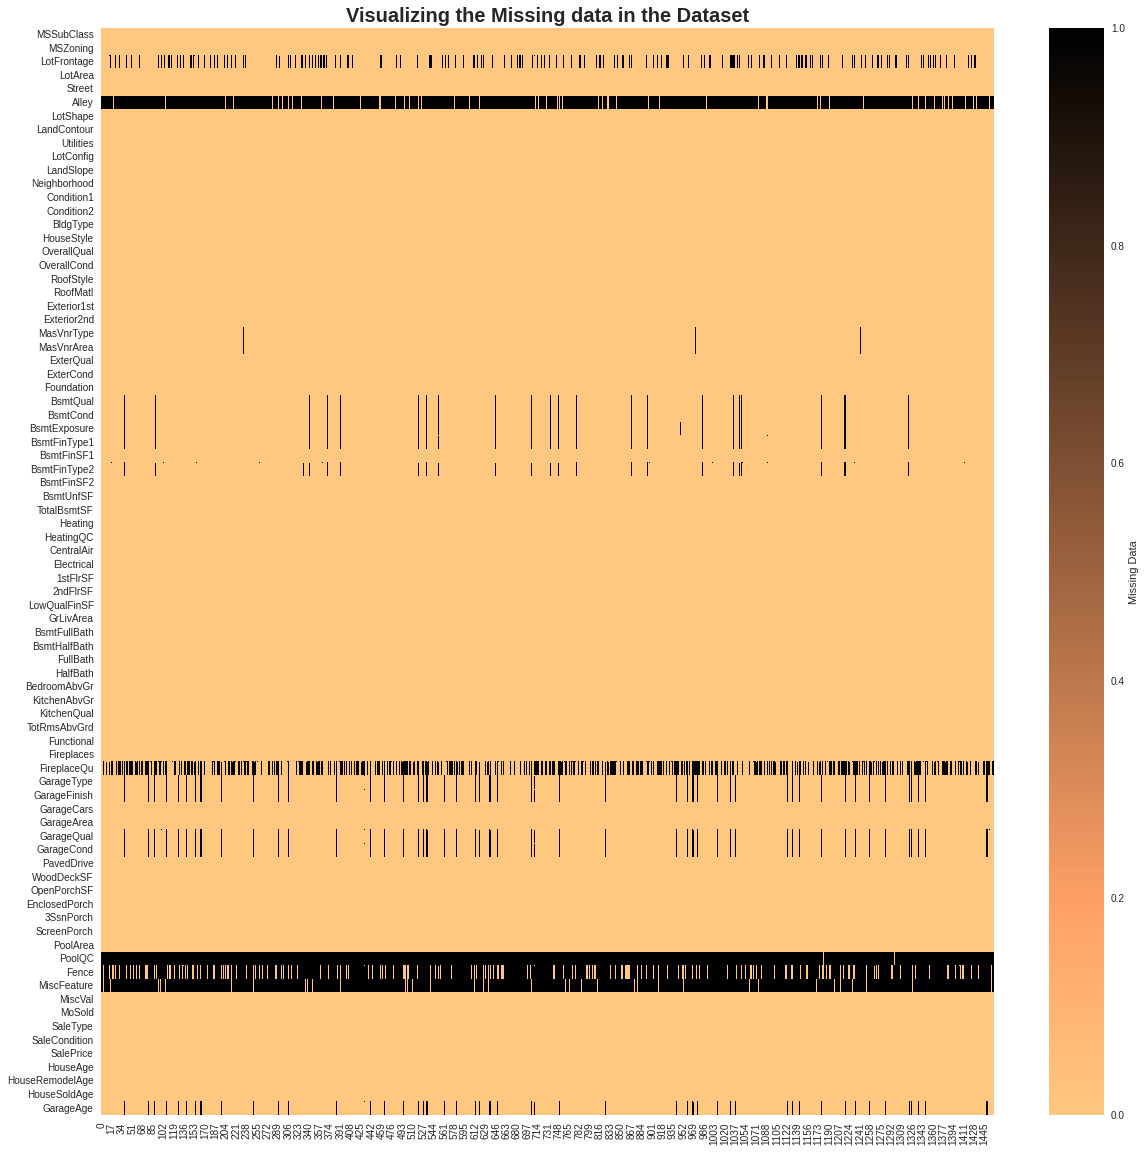

In [111]:
plt.figure(figsize = (20, 20))
sns.heatmap(df_train.isna().transpose(),
            cmap = "copper_r",
            cbar_kws = {'label' : 'Missing Data'})
plt.title("Visualizing the Missing data in the Dataset",
          fontsize = 20, fontweight = "bold")
plt.show()


We have 3 numerical columns with missing values. We will be using the threshold as 17% for the missing values i.e., all the columns having missing values more than this threshold will be dropped. Thus, we are dropping 1 column (`LotFrontage`). Another column containing missing values is `MasVnrArea` where these missing values signify that such houses don't have masonry veneer. Thus, it makes sense to impute NaN with 0. As for the 3rd column `GarageAge`, missing value means that there is no garage present in the house. Hence, we impute these values with 0.

In [112]:
# Creating a dataframe with numerical columns
df_train_num = df_train._get_numeric_data()

# Calculating the missing percent of each column
df_missing_percent = pd.DataFrame(round(df_train_num.isnull().sum() * 100 / len(df_train_num), 2))
df_missing_percent.rename(columns = {0 : 'missing_percent'}, inplace = True)

# Setting the threshold as 17% and dropping the columns above this threshold
columns_to_drop = df_missing_percent[df_missing_percent.missing_percent > 17]
df_train_num.drop(columns_to_drop.index, axis = 1, inplace = True)

# Imputing the missing value for remaining 2 columns with 0
df_train_num = df_train_num.fillna(0)

# Checking if any missing values are remaining
pd.DataFrame(round(df_train_num.isnull().sum() * 100 / len(df_train_num), 2))


,0
MSSubClass,0.0
LotArea,0.0
OverallQual,0.0
OverallCond,0.0
MasVnrArea,0.0
BsmtFinSF1,0.0
BsmtFinSF2,0.0
BsmtUnfSF,0.0
TotalBsmtSF,0.0
1stFlrSF,0.0



As for the categorical columns, they have NAs which do not actually represent missing values. For example, in the column `Alley`, the actual data contains NA which is abbreviated for No Alley Access, hence we cannot consider such values as missing values. Hence, in order to deal with such values, we replace all NA values with 'None'.

In [113]:
# Creating a dataframe with categorical columns
cat_columns = df_train.select_dtypes(include = ['object']).columns.tolist()
df_train_cat = df_train[df_train.columns[df_train.columns.isin(cat_columns)]]
df_train_cat = df_train_cat.fillna("None")

# Checking if any missing values are remaining
pd.DataFrame(round(df_train_cat.isnull().sum() * 100 / len(df_train_cat),2))

,0
MSZoning,0.0
Street,0.0
Alley,0.0
LotShape,0.0
LandContour,0.0
Utilities,0.0
LotConfig,0.0
LandSlope,0.0
Neighborhood,0.0
Condition1,0.0


## Dimensionality Reduction
## 1. Correlation Matrix for Numeric Variables (Pearson's Coefficient)
As a part of dimension reduction, we will calculate the correlation between every 2 numerical columns. If a pair of variables are highly correlated (with their respective correlation value greater than 0.8), then we are dropping 1 of them.

In [114]:
# Drop the target variable while calculating the correlation matrix
df_temp = df_train_num.drop(['SalePrice'], axis = 1, inplace = False)

df_corr_matrix = round(df_temp.corr(), 2)
df_corr_matrix

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,HouseAge,HouseRemodelAge,HouseSoldAge,GarageAge
MSSubClass,1.00,-0.14,0.03,-0.06,0.02,-0.07,-0.07,-0.14,-0.24,-0.25,...,-0.01,-0.04,-0.03,0.01,-0.01,-0.01,-0.03,-0.04,0.02,-0.11
LotArea,-0.14,1.00,0.11,-0.01,0.10,0.21,0.11,-0.00,0.26,0.30,...,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01,-0.01,0.01,0.05
OverallQual,0.03,0.11,1.00,-0.09,0.41,0.24,-0.06,0.31,0.54,0.48,...,-0.11,0.03,0.06,0.07,-0.03,0.07,-0.57,-0.55,0.03,-0.38
OverallCond,-0.06,-0.01,-0.09,1.00,-0.13,-0.05,0.04,-0.14,-0.17,-0.14,...,0.07,0.03,0.05,-0.00,0.07,-0.00,0.38,-0.07,-0.04,0.29
MasVnrArea,0.02,0.10,0.41,-0.13,1.00,0.26,-0.07,0.11,0.36,0.34,...,-0.11,0.02,0.06,0.01,-0.03,-0.01,-0.31,-0.18,0.01,-0.18
BsmtFinSF1,-0.07,0.21,0.24,-0.05,0.26,1.00,-0.05,-0.50,0.52,0.45,...,-0.10,0.03,0.06,0.14,0.00,-0.02,-0.25,-0.13,-0.01,-0.10
BsmtFinSF2,-0.07,0.11,-0.06,0.04,-0.07,-0.05,1.00,-0.21,0.10,0.10,...,0.04,-0.03,0.09,0.04,0.00,-0.02,0.05,0.07,-0.03,0.10
BsmtUnfSF,-0.14,-0.00,0.31,-0.14,0.11,-0.50,-0.21,1.00,0.42,0.32,...,-0.00,0.02,-0.01,-0.04,-0.02,0.03,-0.15,-0.18,0.04,-0.16
TotalBsmtSF,-0.24,0.26,0.54,-0.17,0.36,0.52,0.10,0.42,1.00,0.82,...,-0.10,0.04,0.08,0.13,-0.02,0.01,-0.39,-0.29,0.01,-0.23
1stFlrSF,-0.25,0.30,0.48,-0.14,0.34,0.45,0.10,0.32,0.82,1.00,...,-0.07,0.06,0.09,0.13,-0.02,0.03,-0.28,-0.24,0.01,-0.15


Creating a correlation matrix heatmap to better visualize the correlation values

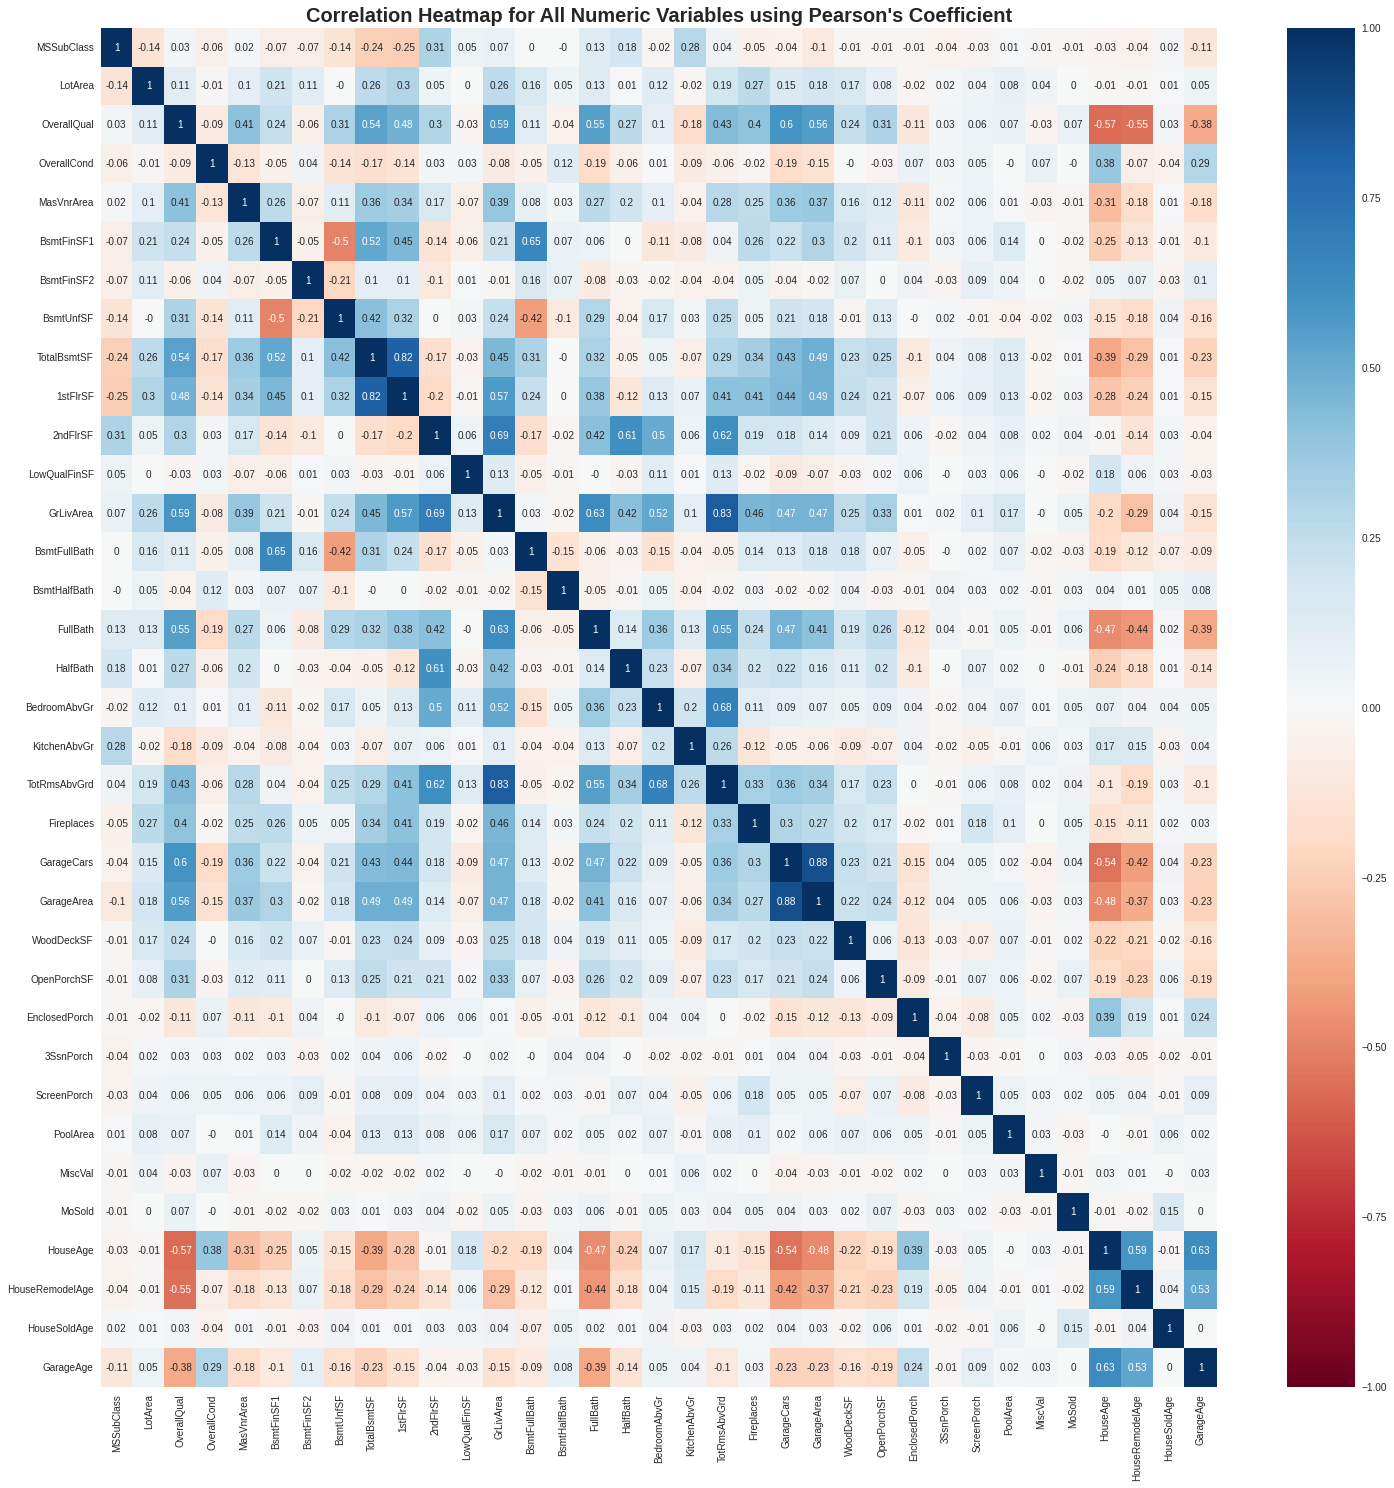

In [115]:
# Plotting a correlation matrix heatmap

plt.figure(figsize = (25, 25))
sns.heatmap(df_corr_matrix, annot = True, square = False,
            vmin = -1, vmax = 1, cmap = "RdBu")
plt.title("Correlation Heatmap for All Numeric Variables using Pearson's Coefficient",
          fontsize = 20,
          weight = "bold")
plt.show()

In [116]:
# Getting a dataframe of highly correlated numerical variables (with corr value > 0.8)
df_corr_stacked = pd.DataFrame(df_temp.corr().unstack().sort_values().drop_duplicates())
df_corr_stacked.rename(columns = {0 : 'corr_value'}, inplace = True)
df_corr_stacked = df_corr_stacked[(df_corr_stacked.corr_value > 0.8) & (df_corr_stacked.corr_value != 1)]
df_corr_stacked.reset_index(inplace = True)
df_corr_stacked

,level_0,level_1,corr_value
0,TotalBsmtSF,1stFlrSF,0.819530
1,TotRmsAbvGrd,GrLivArea,0.825489
2,GarageCars,GarageArea,0.882475


Based on this correlation matrix, 3 pairs of variables are highly correlated. Hence, we are dropping the columns: `TotalBsmtSF`, `TotRmsAbvGrd` and `GarageCars`.

In [117]:
df_train_num_dr = df_train_num.drop(["TotalBsmtSF", "TotRmsAbvGrd", "GarageCars"],
                                    axis = 1, inplace = False)
df_train_num_dr.head() # Processed numerical data

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,HouseRemodelAge,HouseSoldAge,GarageAge
0,60,8450,7,5,196.0,706,0,150,856,854,...,0,0,0,0,2,208500,19,19,14,19.0
1,20,9600,6,8,0.0,978,0,284,1262,0,...,0,0,0,0,5,181500,46,46,15,46.0
2,60,11250,7,5,162.0,486,0,434,920,866,...,0,0,0,0,9,223500,21,20,14,21.0
3,70,9550,7,5,0.0,216,0,540,961,756,...,0,0,0,0,2,140000,107,52,16,24.0
4,60,14260,8,5,350.0,655,0,490,1145,1053,...,0,0,0,0,12,250000,22,22,14,22.0


## 2. Correlation Matrix for Categorical Variables (Crammer's Rule)
Definition of Crammer's Rule - We are defining a function for calculating the correlation matrix between categorical columns of a dataset. This user-defined function has been obtained from Kaggle: https://www.kaggle.com/chrisbss1/cramer-s-v-correlation-matrix

In [118]:
def cramers_V(var1, var2) :
  crosstab = np.array(pd.crosstab(var1, var2, rownames = None, colnames = None)) # Cross table building
  stat = chi2_contingency(crosstab, correction = False)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape) - 1 # Take the minimum value between the columns and the rows of the cross table
  return (stat / (obs * mini))

Encoding categorical columns to convert to a form that can be used for Crammer's Rule

In [119]:
cat_encoded = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame()

for i in df_train_cat.columns :
  data_encoded[i] = cat_encoded.fit_transform(df_train_cat[i])

data_encoded.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,5,2,...,1,2,5,5,2,3,4,1,8,4
1,3,1,1,3,3,0,2,0,24,1,...,1,2,5,5,2,3,4,1,8,4
2,3,1,1,0,3,0,4,0,5,2,...,1,2,5,5,2,3,4,1,8,4
3,3,1,1,0,3,0,0,0,6,2,...,5,3,5,5,2,3,4,1,8,0
4,3,1,1,0,3,0,2,0,15,2,...,1,2,5,5,2,3,4,1,8,4


Building a correlation matrix to include all the categorical columns

In [120]:
mat_rows = []

# Using for loop and calling the crammer function to create the matrix
for i in data_encoded:
  mat_cols = []
  for j in data_encoded:
    cram = cramers_V(data_encoded[i], data_encoded[j])
    mat_cols.append(round(cram, 2))
  mat_rows.append(mat_cols)

cram_res = np.array(mat_rows)
df_confusion_mat = pd.DataFrame(cram_res, columns = data_encoded.columns,
                                index = data_encoded.columns)
df_confusion_mat # Correlation matrix of categorical columns

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
MSZoning,1.00,0.06,0.15,0.03,0.01,0.00,0.01,0.01,0.43,0.01,...,0.05,0.04,0.02,0.01,0.05,0.00,0.00,0.00,0.03,0.02
Street,0.06,1.00,0.00,0.00,0.02,0.00,0.00,0.03,0.06,0.03,...,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.02,0.01
Alley,0.15,0.00,1.00,0.01,0.01,0.00,0.00,0.00,0.20,0.02,...,0.04,0.02,0.02,0.02,0.03,0.00,0.00,0.00,0.01,0.01
LotShape,0.03,0.00,0.01,1.00,0.02,0.00,0.05,0.02,0.08,0.02,...,0.02,0.02,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00
LandContour,0.01,0.02,0.01,0.02,1.00,0.00,0.01,0.21,0.15,0.00,...,0.02,0.01,0.00,0.00,0.02,0.00,0.00,0.00,0.01,0.01
Utilities,0.00,0.00,0.00,0.00,0.00,1.00,0.01,0.00,0.03,0.00,...,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.01
LotConfig,0.01,0.00,0.00,0.05,0.01,0.01,1.00,0.01,0.04,0.03,...,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00
LandSlope,0.01,0.03,0.00,0.02,0.21,0.00,0.01,1.00,0.12,0.00,...,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Neighborhood,0.43,0.06,0.20,0.08,0.15,0.03,0.04,0.12,1.00,0.05,...,0.11,0.19,0.06,0.05,0.11,0.02,0.05,0.01,0.05,0.06
Condition1,0.01,0.03,0.02,0.02,0.00,0.00,0.03,0.00,0.05,1.00,...,0.01,0.02,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.00


In [121]:
# Getting a dataframe of highly correlated categorical variables (with corr value > 0.6)
df_confusion_mat_stacked = pd.DataFrame(df_confusion_mat.corr().unstack().sort_values().drop_duplicates())
df_confusion_mat_stacked.rename(columns = {0 : 'corr_value'}, inplace = True)

df_confusion_mat_stacked = df_confusion_mat_stacked[(df_confusion_mat_stacked.corr_value > 0.6) &
                                                    (df_confusion_mat_stacked.corr_value != 1)]

df_confusion_mat_stacked.index.names = ["index_1", "index_2"]
df_confusion_mat_stacked.reset_index(inplace = True)
df_confusion_mat_stacked

,index_1,index_2,corr_value
0,BsmtQual,BsmtFinType1,0.607478
1,GarageFinish,GarageQual,0.610604
2,GarageCond,GarageFinish,0.613192
3,MSZoning,Neighborhood,0.644037
4,GarageType,GarageFinish,0.743423
5,GarageCond,GarageQual,0.799799
6,Exterior2nd,Exterior1st,0.851769


Identifying the categorical columns that can to be dropped:

We identify the pairs of categorical variables that are highly correlated. Now, in order to choose which variable can be dropped, we check the number of categories for the pair of correlated columns. The category having more number of categorical values is chosen to be dropped so that while encoding the categorical columns into numerical, lesser number of newer columns are created.

In [122]:
df_train_cat_str = df_train_cat.describe().transpose() 
df_train_cat_str.reset_index(inplace = True)

df_index1_cnt = df_confusion_mat_stacked[["index_1", "index_2"]].merge(df_train_cat_str[["index", "unique"]],
                               how = "left",
                               left_on = "index_1",
                               right_on = "index")
df_index1_cnt = df_index1_cnt.rename(columns = {"unique" : "cat1"})

df_index2_cnt = df_index1_cnt[["index_1", "index_2", "index", "cat1"]].merge(df_train_cat_str[["index", "unique"]],
                               how = "left",
                               left_on = "index_2",
                               right_on = "index")

df_index2_cnt= df_index2_cnt.rename(columns = {"unique" : "cat2"})

df_index2_cnt["to_drop"] = np.where(df_index2_cnt["cat1"] > df_index2_cnt["cat2"],
                                    df_index2_cnt["index_1"],
                                    df_index2_cnt["index_2"])

cat_cols_to_drop = df_index2_cnt["to_drop"].unique()

df_train_cat = df_train_cat.drop(cat_cols_to_drop, axis = 1)

df_train_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageFinish,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,Gd,Typ,None,RFn,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,...,TA,Typ,TA,RFn,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,Gd,Typ,TA,RFn,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,Gd,Typ,Gd,Unf,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,...,Gd,Typ,TA,RFn,Y,None,None,None,WD,Normal


# Data Exploration and Visualization
## 1. Combining Categories

We can see from the bar plot that a lot of categorical columns have a few rare categories that can be combined together under a single category. This is done so that during encoding these categorical columns into numerical values, lesser number of new columns are created.

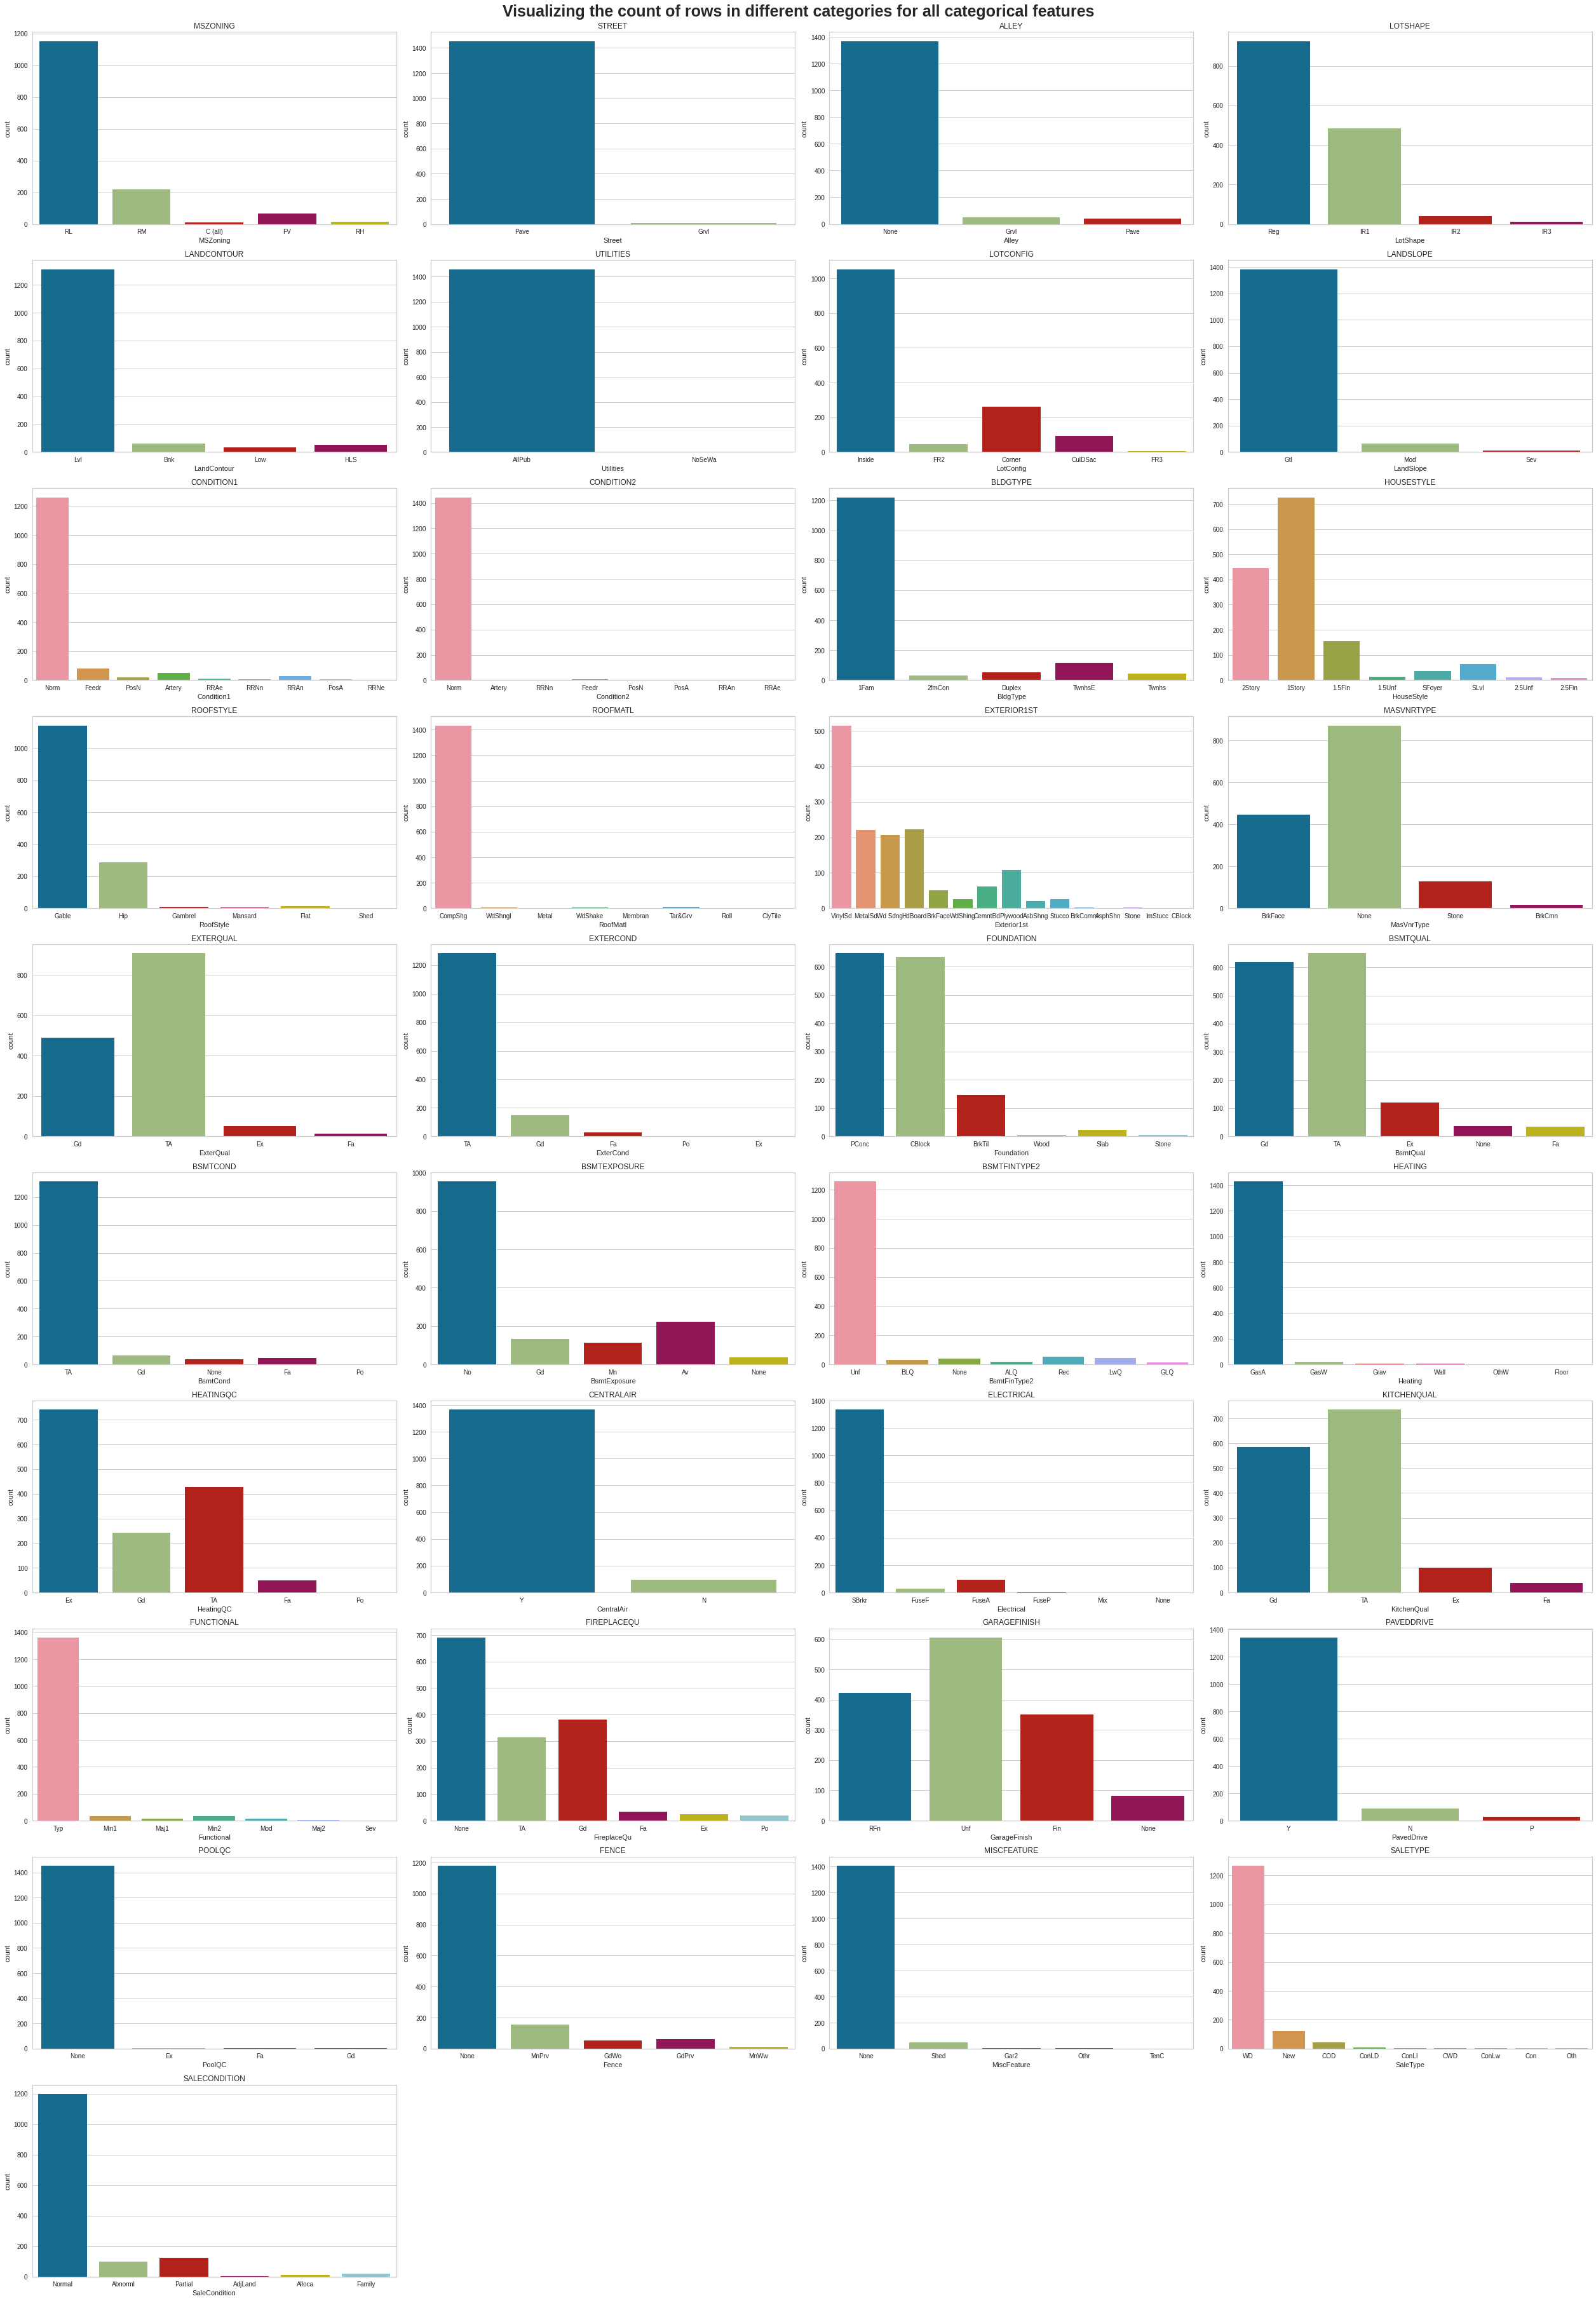

In [123]:
warnings.filterwarnings("ignore")
plt.figure(figsize = (35, 50))
plt.suptitle("Visualizing the count of rows in different categories for all categorical features",
             fontsize = 25, y = 1.005, fontweight = "bold")

for n, ticker in enumerate(df_train_cat.columns):
    ax = plt.subplot(10, 4, n + 1)
    ax = sns.countplot(df_train_cat[ticker])
    ax.set_title(ticker.upper(), fontsize = 12)
    plt.tight_layout()

We have fixed a threshold of 20% of the most dominant category, that is, if any category has records 20% less than the most dominant category, then we combine such categories under "Other" category. This is done for all the 37 categorical columns.

In [124]:
# Creating a copy of the categorical columns dataframe
df_train_cat_new = df_train_cat

# For loop to iterate through all the categorical columns in dataset
for i, column in enumerate(df_train_cat.columns):
  grouped_df = pd.DataFrame(df_train_cat[column].value_counts())
  # Creating an empty list to store the categories crossing the threshold of 0.2
  to_combine = []
  # Iterating through all the categories in current categorical column
  for index, row in grouped_df.itertuples():
    max_value = max(grouped_df.values)
    if(row < 0.2 * max_value):
      to_combine.append(index) # append to the empty list if threshold condition satisfies
  
  # Replacing the category with 'Other' for the list of categories obtained above
  df_train_cat_new = df_train_cat_new.assign(new_column = np.where(df_train_cat_new[column].isin(to_combine),
                                                                   'Other', df_train_cat_new[column]))
  df_train_cat_new[column] = df_train_cat_new['new_column']

df_train_cat_new.drop(['new_column'], axis = 1, inplace = True)

df_train_cat_new.head() # Viewing the final data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageFinish,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,Gd,Typ,None,RFn,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,Other,Gtl,Other,Norm,...,TA,Typ,TA,RFn,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,Gd,Typ,TA,RFn,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,Gd,Typ,Gd,Unf,Y,None,None,None,WD,Other
4,RL,Pave,None,IR1,Lvl,AllPub,Other,Gtl,Norm,Norm,...,Gd,Typ,TA,RFn,Y,None,None,None,WD,Normal


Using this method, we have reduced 104 categories (cumulative sum of all categorical columns combined).

In [125]:
sum_old = 0
for i, column in enumerate(df_train_cat.columns):
  sum_old = sum_old + len(df_train_cat[column].value_counts())

sum_new = 0
for i, column in enumerate(df_train_cat_new.columns):
  sum_new = sum_new + len(df_train_cat_new[column].value_counts())

print("Number of Categories Reduced = " + str(sum_old - sum_new))

Number of Categories Reduced = 104


In [126]:
for i, column in enumerate(df_train_cat_new.columns):
  grouped_df = pd.DataFrame(df_train_cat_new[column].value_counts())
  print(grouped_df)

       MSZoning
RL         1151
Other       309
       Street
Pave     1454
Other       6
       Alley
None    1369
Other     91
       LotShape
Reg         925
IR1         484
Other        51
       LandContour
Lvl           1311
Other          149
        Utilities
AllPub       1459
Other           1
        LotConfig
Inside       1052
Corner        263
Other         145
       LandSlope
Gtl         1382
Other         78
       Condition1
Norm         1260
Other         200
       Condition2
Norm         1445
Other          15
       BldgType
1Fam       1220
Other       240
        HouseStyle
1Story         726
2Story         445
1.5Fin         154
Other          135
       RoofStyle
Gable       1141
Hip          286
Other         33
         RoofMatl
CompShg      1434
Other          26
         Exterior1st
VinylSd          515
HdBoard          222
MetalSd          220
Wd Sdng          206
Other            189
Plywood          108
         MasVnrType
None            872
BrkFace      

## 2. Assessing the correlation between all numerical variables and Target - "Sales Price"

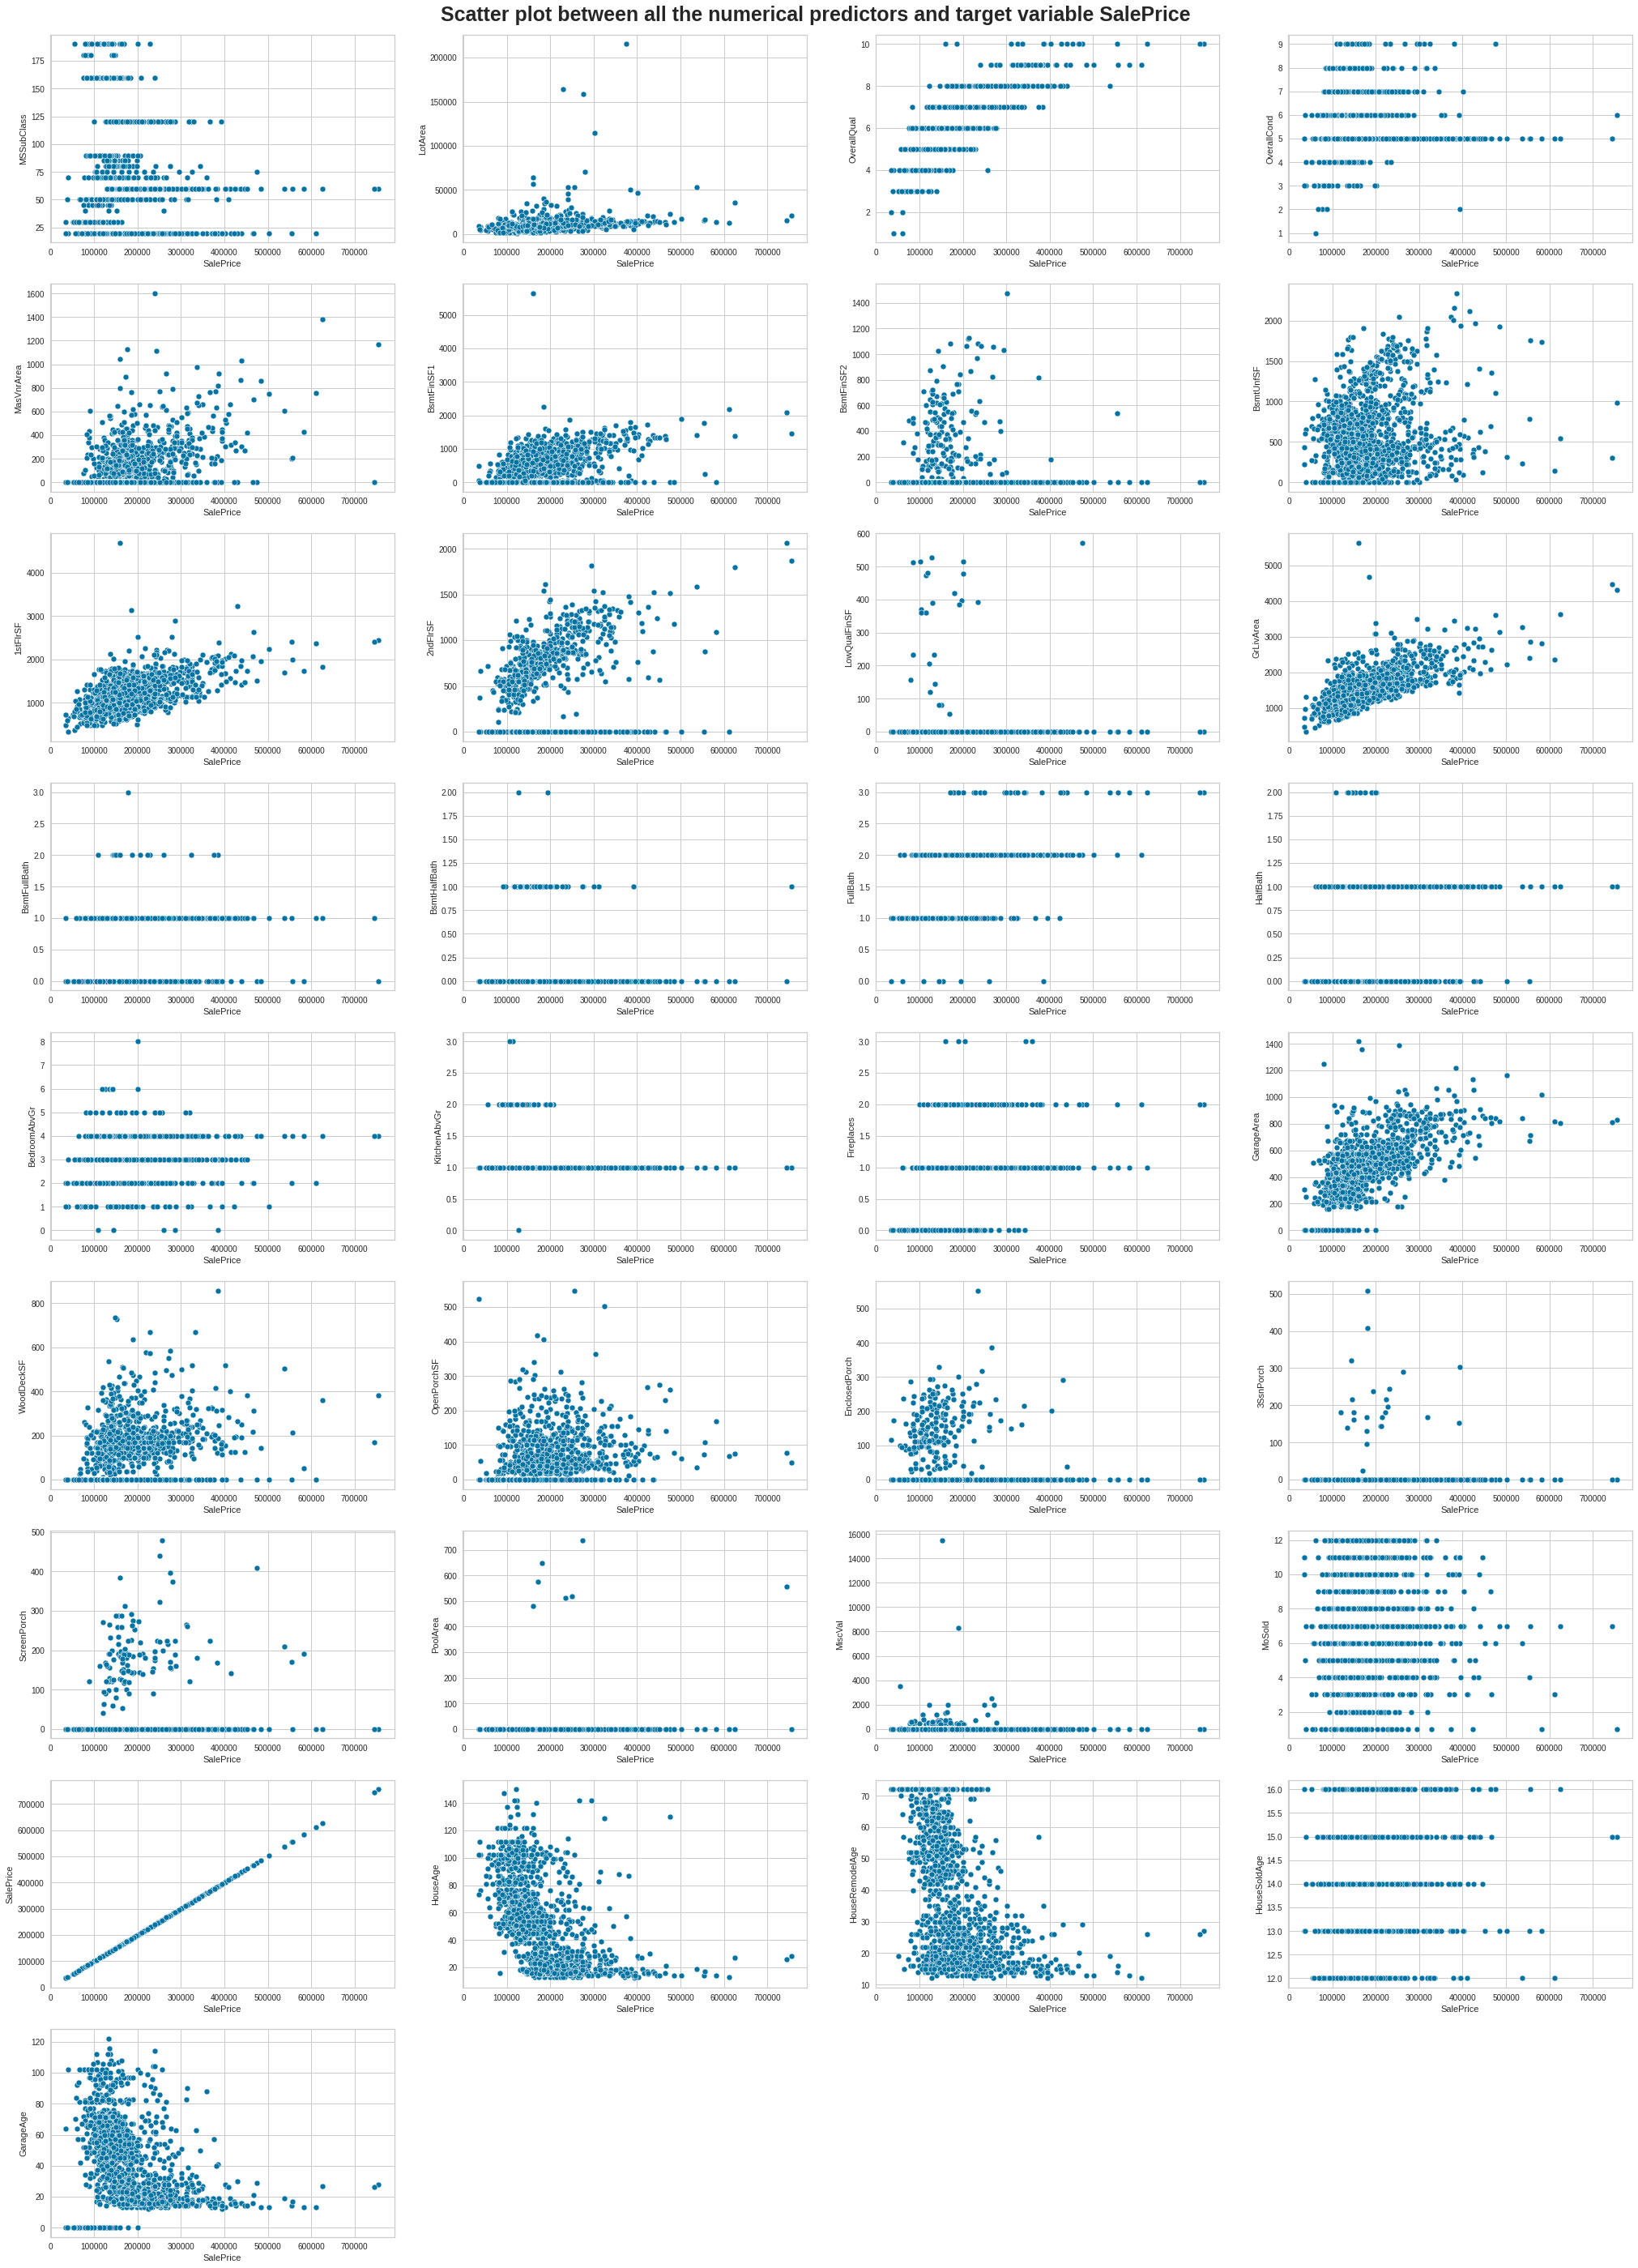

In [127]:
df_scatter_num = df_train_num_dr

warnings.filterwarnings("ignore")
plt.subplots(figsize = (35, 50))
plt.suptitle("Scatter plot between all the numerical predictors and target variable SalePrice",
             fontsize = 25, y = 0.89, fontweight = "bold")

count = 1
for i in df_scatter_num.columns:
     plt.subplot(9, 4, count)
     sns.scatterplot(df_scatter_num["SalePrice"], df_scatter_num[i])
     count = count + 1
plt.tight_layout
plt.show()

We are dropping the numerical predictors that are weakly correlated with the target variable.

In [128]:
# Creating an empty list to store the correlation values between each predictor and target
corr_with_saleprice_col = []

for j in df_scatter_num.columns:
  list_temp = []
  corr = df_scatter_num[j].corr(df_scatter_num["SalePrice"])
  list_temp.append(j)
  list_temp.append(corr)
  corr_with_saleprice_col.append(list_temp)

df_corr_with_saleprice = pd.DataFrame(data = corr_with_saleprice_col,
                                      columns = ["Predictor","Correlation_Coefficient"])

# Dropping the weakly correlated columns with Sales Price (target) having less than 0.5 as correlation coefficients 
df_weak_corr_with_saleprice = df_corr_with_saleprice[abs(df_corr_with_saleprice.Correlation_Coefficient ) < 0.2]
df_weak_corr_with_saleprice_col = df_weak_corr_with_saleprice["Predictor"].unique()

df_scatter_num = df_scatter_num.drop(df_weak_corr_with_saleprice_col, axis = 1)
df_scatter_num

,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,HouseAge,HouseRemodelAge,GarageAge
0,8450,7,196.0,706,150,856,854,1710,1,2,1,0,548,0,61,208500,19,19,19.0
1,9600,6,0.0,978,284,1262,0,1262,0,2,0,1,460,298,0,181500,46,46,46.0
2,11250,7,162.0,486,434,920,866,1786,1,2,1,1,608,0,42,223500,21,20,21.0
3,9550,7,0.0,216,540,961,756,1717,1,1,0,1,642,0,35,140000,107,52,24.0
4,14260,8,350.0,655,490,1145,1053,2198,1,2,1,1,836,192,84,250000,22,22,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,0.0,0,953,953,694,1647,0,2,1,1,460,0,40,175000,23,22,23.0
1456,13175,6,119.0,790,589,2073,0,2073,1,2,0,2,500,349,0,210000,44,34,44.0
1457,9042,7,0.0,275,877,1188,1152,2340,0,2,0,2,252,0,60,266500,81,16,81.0
1458,9717,5,0.0,49,0,1078,0,1078,1,1,0,0,240,366,0,142125,72,26,72.0


## 3. Assessing the correlation between Categorical Predictors and Target - SalePrice

Similarly, we are assessing the correlation coefficients between categorical and target variables and drop the predictors that are weakly correlated.

In [129]:
# Label Encoding the categorical columns to allow scatter plot visualization
cat_encoded = preprocessing.LabelEncoder()
df_train_cat_encoded = pd.DataFrame()

for i in df_train_cat_new.columns :
  df_train_cat_encoded[i] = cat_encoded.fit_transform(df_train_cat_new[i])

df_train_cat_encoded.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageFinish,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,1,0,2,0,0,1,0,0,0,...,0,1,1,2,1,0,0,0,1,0
1,1,1,0,2,0,0,2,0,1,0,...,2,1,3,2,1,0,0,0,1,0
2,1,1,0,0,0,0,1,0,0,0,...,0,1,3,2,1,0,0,0,1,0
3,1,1,0,0,0,0,0,0,0,0,...,0,1,0,3,1,0,0,0,1,1
4,1,1,0,0,0,0,2,0,0,0,...,0,1,3,2,1,0,0,0,1,0


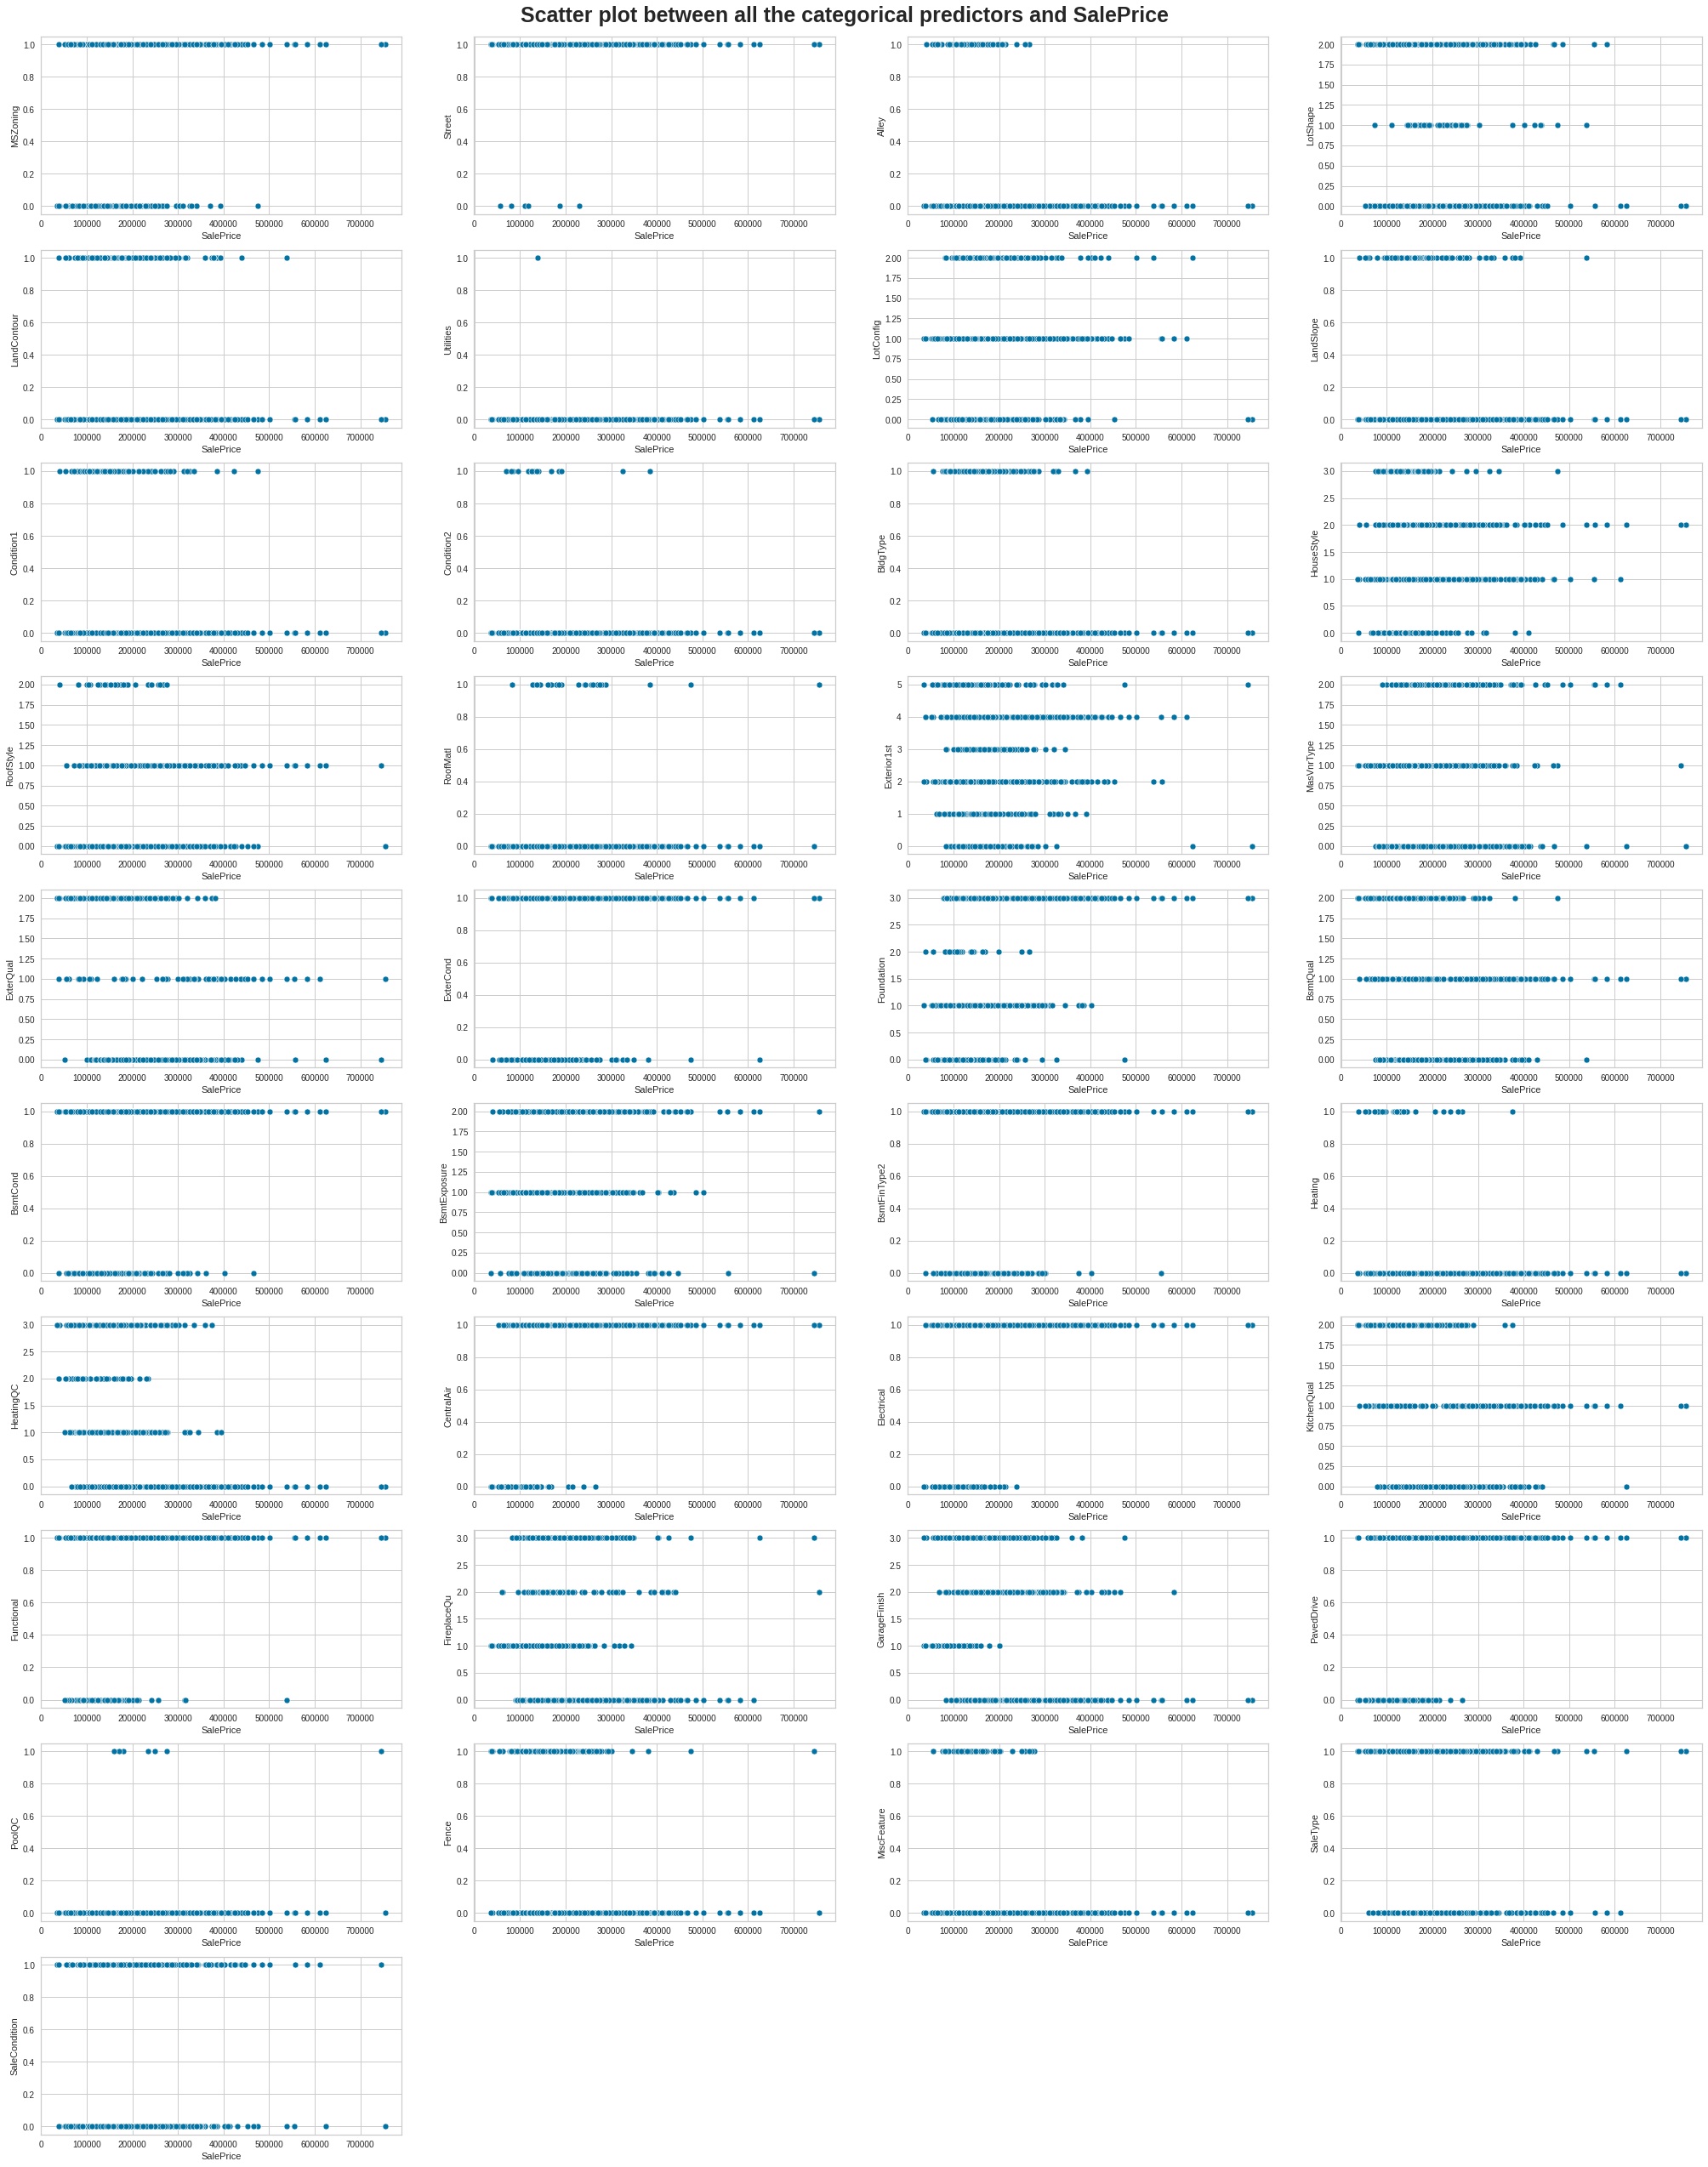

In [130]:
# Creating an empty list to store the correlation values between each predictor and target
corr_with_saleprice_cat_col = []

warnings.filterwarnings("ignore")
plt.subplots(figsize = (35, 50))
plt.suptitle("Scatter plot between all the categorical predictors and SalePrice",
             fontsize = 25, y = 0.89, fontweight = "bold")

count = 1
for k in df_train_cat_encoded.columns:
     plt.subplot(11, 4, count)
     sns.scatterplot(df_train['SalePrice'], df_train_cat_encoded[k])
     count = count + 1
     list_cat_temp = []
     corr = df_train_cat_encoded[k].corr(df_train["SalePrice"])
     list_cat_temp.append(k)
     list_cat_temp.append(corr)
     corr_with_saleprice_cat_col.append(list_cat_temp)

plt.tight_layout
plt.show()

In [131]:
df_scatter_cat = df_train_cat_encoded
df_corr_with_saleprice_cat = pd.DataFrame(data = corr_with_saleprice_cat_col,
                                          columns = ["Predictor", "Correlation_Coefficient"])
df_corr_with_saleprice_cat

,Predictor,Correlation_Coefficient
0,MSZoning,0.245063
1,Street,0.041036
2,Alley,-0.123611
3,LotShape,-0.250414
4,LandContour,0.027545
5,Utilities,-0.014314
6,LotConfig,0.063080
7,LandSlope,0.051116
8,Condition1,-0.112968
9,Condition2,-0.030676


In [132]:
# Dropping the weakly correlated columns with Target Variable - Sales variable having less than 0.5 as correlation coefficients 
df_weak_corr_with_saleprice_cat = df_corr_with_saleprice_cat[abs(df_corr_with_saleprice_cat.Correlation_Coefficient ) < 0.2]
df_weak_corr_with_saleprice_cat_col = df_weak_corr_with_saleprice_cat["Predictor"].unique()

df_train_cat = df_train_cat.drop(df_weak_corr_with_saleprice_cat_col, axis = 1)
df_train_cat

,MSZoning,LotShape,ExterQual,Foundation,BsmtQual,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,PavedDrive,SaleType
0,RL,Reg,Gd,PConc,Gd,Ex,Y,SBrkr,Gd,RFn,Y,WD
1,RL,Reg,TA,CBlock,Gd,Ex,Y,SBrkr,TA,RFn,Y,WD
2,RL,IR1,Gd,PConc,Gd,Ex,Y,SBrkr,Gd,RFn,Y,WD
3,RL,IR1,TA,BrkTil,TA,Gd,Y,SBrkr,Gd,Unf,Y,WD
4,RL,IR1,Gd,PConc,Gd,Ex,Y,SBrkr,Gd,RFn,Y,WD
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,TA,PConc,Gd,Ex,Y,SBrkr,TA,RFn,Y,WD
1456,RL,Reg,TA,CBlock,Gd,TA,Y,SBrkr,TA,Unf,Y,WD
1457,RL,Reg,Ex,Stone,TA,Ex,Y,SBrkr,Gd,RFn,Y,WD
1458,RL,Reg,TA,CBlock,TA,Gd,Y,FuseA,Gd,Unf,Y,WD


## 4. Box Plot Visualization to check for Outliers

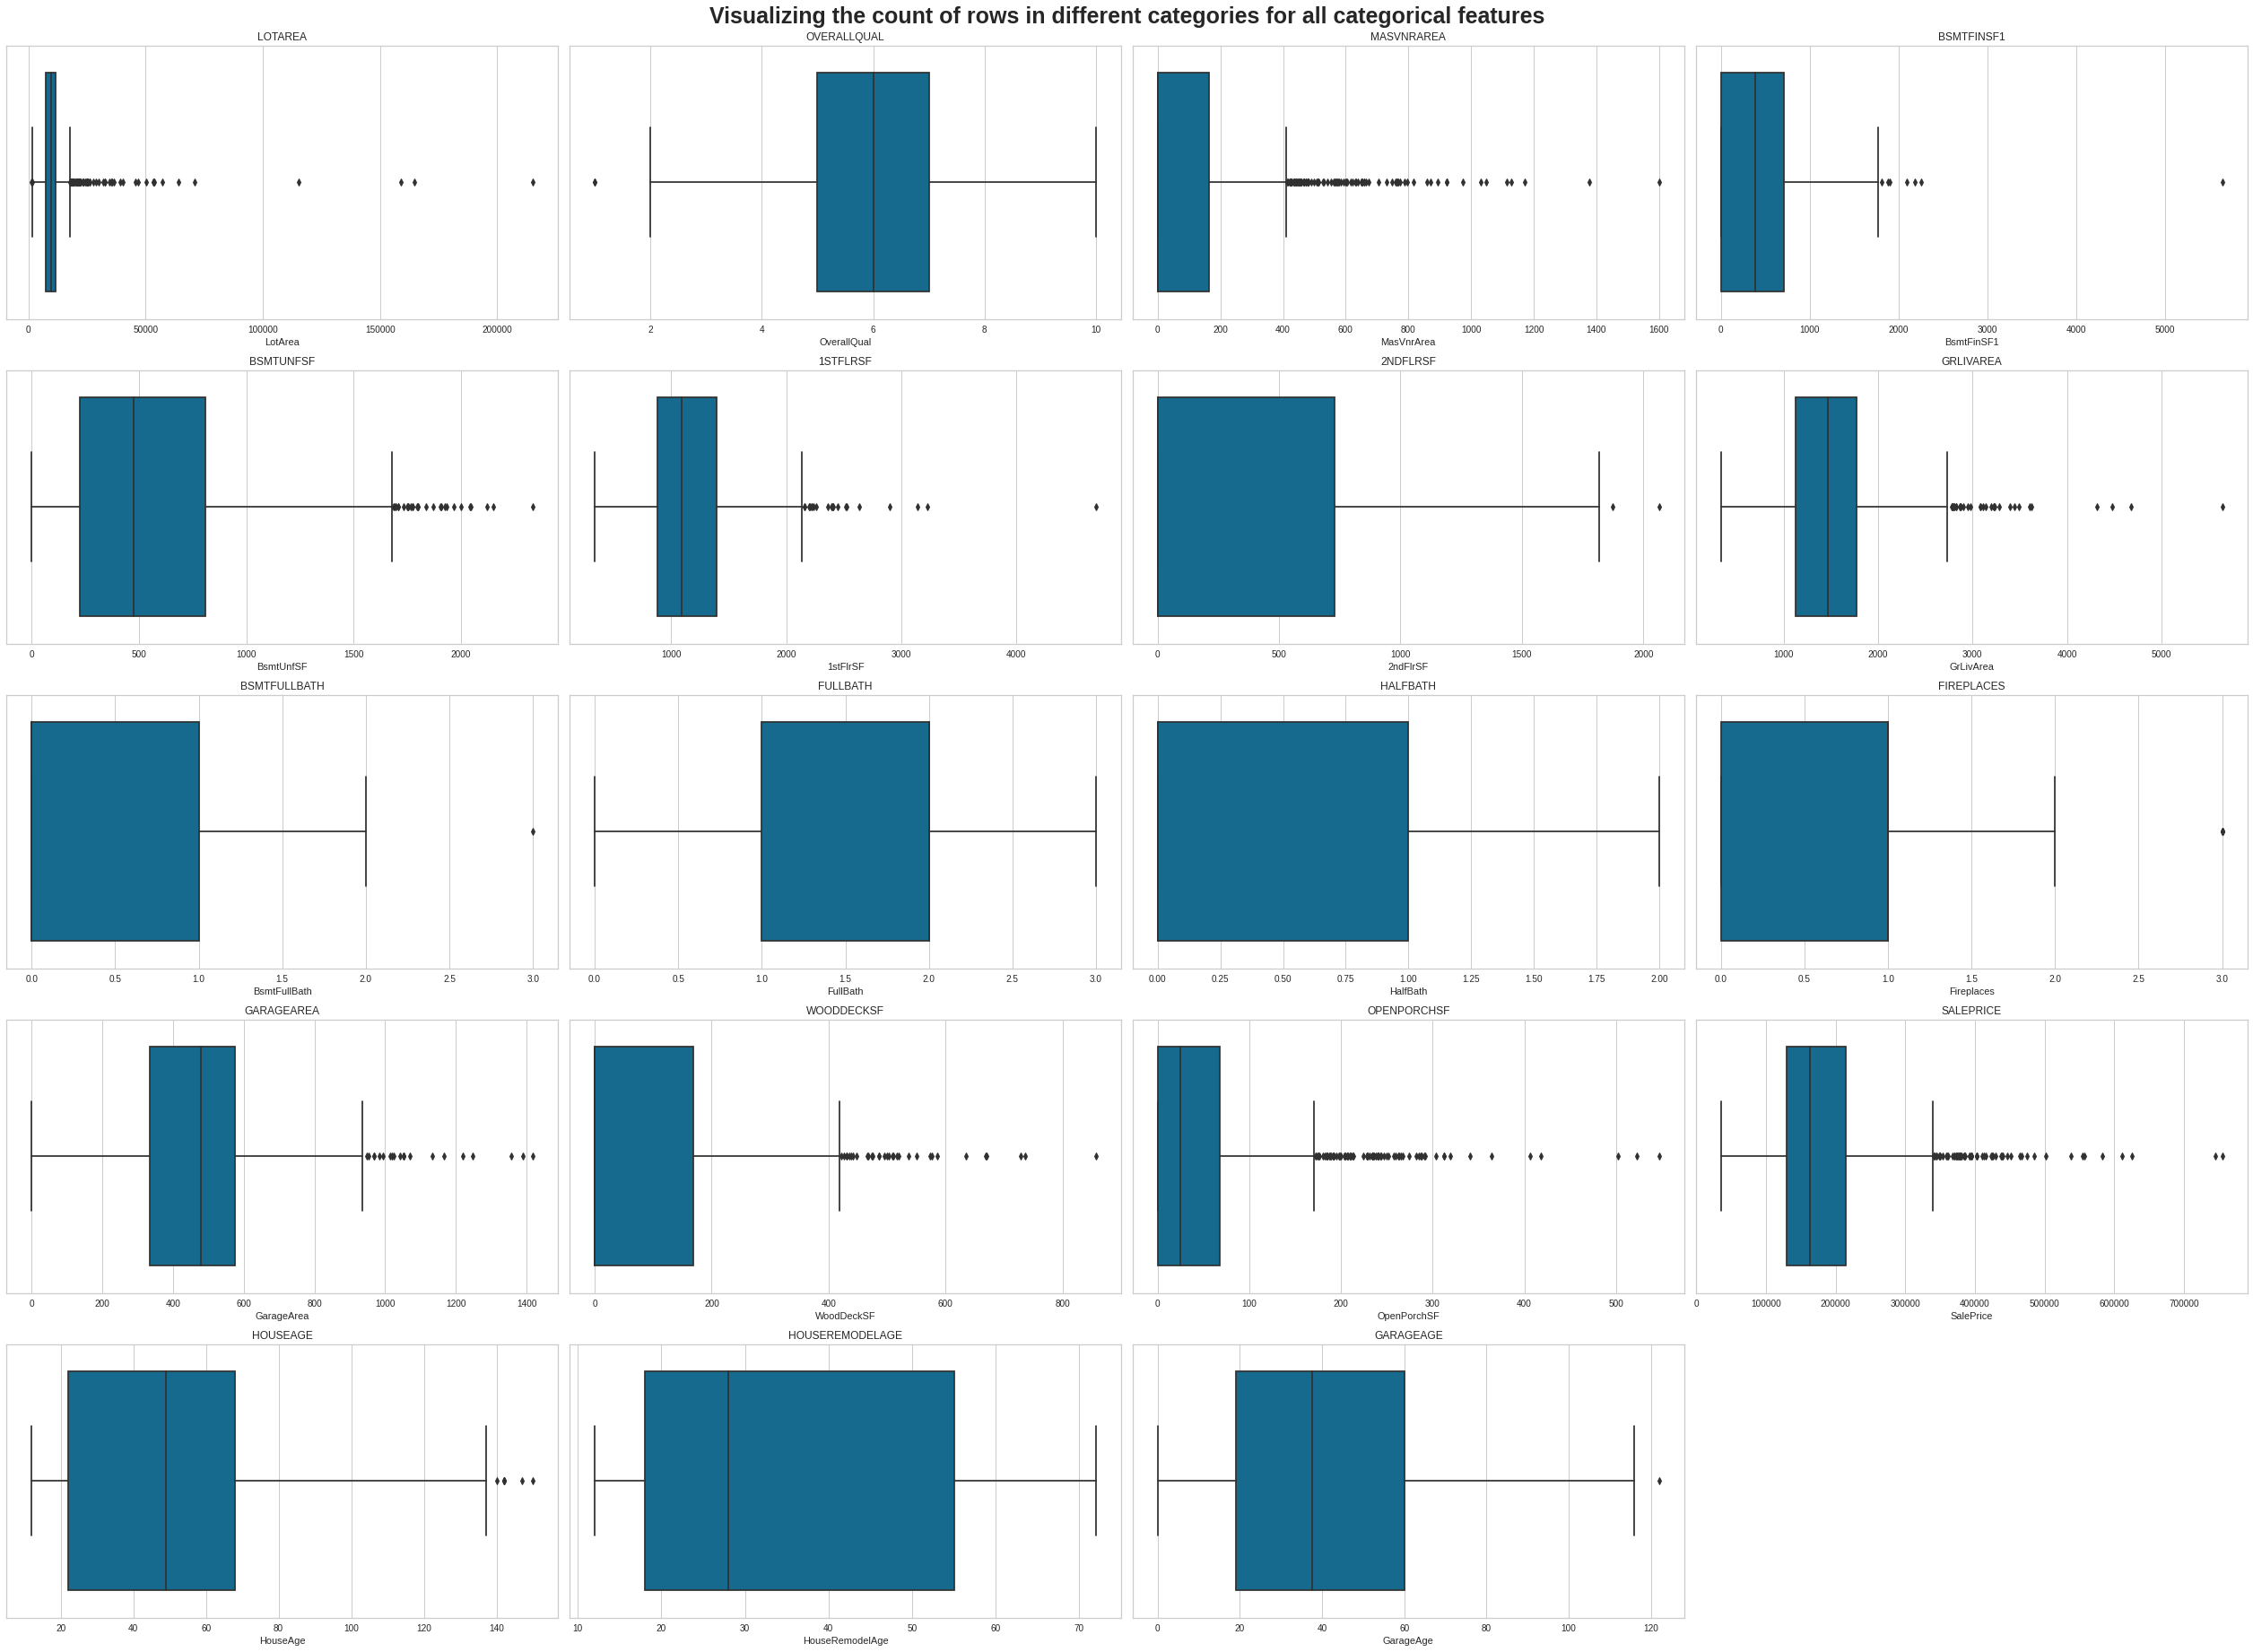

In [133]:
warnings.filterwarnings("ignore")
plt.figure(figsize = (35, 50))
plt.suptitle("Visualizing the count of rows in different categories for all categorical features",
             fontsize = 25, y = 1.005, fontweight = "bold")

for n, ticker in enumerate(df_scatter_num.columns):
    ax = plt.subplot(10, 4, n + 1)
    ax = sns.boxplot(df_scatter_num[ticker])
    ax.set_title(ticker.upper(), fontsize = 12)
    plt.tight_layout()

## Data Encoding - Performing encoding of Categorical Columns in Dataset

One-Hot Encoding

In [134]:
# df_train_cat_new

# from sklearn.preprocessing import OneHotEncoder
# y = OneHotEncoder().fit_transform(df_train_cat_new)


# # use pd.concat to join the new columns with your original dataframe
# df = pd.concat([df_train_cat_new, pd.get_dummies(df_train_cat_new['country'], prefix='country')],axis=1)

# # now drop the original 'country' column (you don't need it anymore)
# df.drop(['country'],axis=1, inplace=True)
# print(y)

# df_scatter_cat
# df_train_cat_new['Alley']
# oh_encoder = OneHotEncoder(handle_unknown='ignore')

# for col in df_train_cat_new.columns:
#   encode_col = pd.get_dummies(df_train_cat_new[col], prefix = col)
#   new_df = df_train_cat_new.join(encode_col)



#creating instance of one-hot-encoder


#perform one-hot encoding on 'team' column 
# encoder_df = pd.DataFrame(encoder.fit_transform(df_train_cat_new[['Alley']]).toarray())

#merge one-hot encoded columns back with original DataFrame


#view final df
# print(final_df)

# final_df.drop('team', axis=1, inplace=True)

# #view final df
# print(final_df)

# final_df.columns = ['points', 'teamA', 'teamB', 'teamC']

# #view final df
# # print(final_df)
# final_df
# df_train_cat_encoded

## Target Encoding

In [135]:
# Target Encoding
df_train_cat_comb = pd.concat([df_train_cat, df_train['SalePrice']], axis = 1)

#Create target encoding object
encoder = ce.TargetEncoder(cols = df_train_cat_comb.loc[:, df_train_cat_comb.columns != "SalePrice"]) 

#Fit and Transform Train Data
data_encoded = encoder.fit_transform(df_train_cat_comb.loc[:, df_train_cat_comb.columns != "SalePrice"], 
                                     df_train_cat_comb["SalePrice"])
data_encoded # Processed categorical data

,MSZoning,LotShape,ExterQual,Foundation,BsmtQual,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,PavedDrive,SaleType
0,191004.994787,164754.818378,231633.510246,225230.442040,202688.478964,214914.429150,186186.70989,186825.113193,212116.023891,202068.869668,186433.973881,173401.836622
1,191004.994787,164754.818378,144341.313466,149805.714511,202688.478964,214914.429150,186186.70989,186825.113193,139962.511565,202068.869668,186433.973881,173401.836622
2,191004.994787,206101.665289,231633.510246,225230.442040,202688.478964,214914.429150,186186.70989,186825.113193,212116.023891,202068.869668,186433.973881,173401.836622
3,191004.994787,206101.665289,144341.313466,132291.075342,140759.818182,156858.871369,186186.70989,186825.113193,212116.023891,142156.423140,186433.973881,173401.836622
4,191004.994787,206101.665289,231633.510246,225230.442040,202688.478964,214914.429150,186186.70989,186825.113193,212116.023891,202068.869668,186433.973881,173401.836622
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,191004.994787,164754.818378,144341.313466,225230.442040,202688.478964,214914.429150,186186.70989,186825.113193,139962.511565,202068.869668,186433.973881,173401.836622
1456,191004.994787,164754.818378,144341.313466,149805.714511,202688.478964,142362.876168,186186.70989,186825.113193,139962.511565,142156.423140,186433.973881,173401.836622
1457,191004.994787,164754.818378,367360.961538,166059.305298,140759.818182,214914.429150,186186.70989,186825.113193,212116.023891,202068.869668,186433.973881,173401.836622
1458,191004.994787,164754.818378,144341.313466,149805.714511,140759.818182,156858.871369,186186.70989,122196.893617,212116.023891,142156.423140,186433.973881,173401.836622


In [136]:
# Combining the processed numerical and categorical columns into single dataframe
df_processed_data = pd.concat([df_scatter_num, data_encoded], axis = 1)

# Extracting the target variable (SalePrice) and putting it as the last column
target_column = df_processed_data.pop('SalePrice')
df_processed_data.insert(loc = len(df_processed_data.columns),
                         column = 'SalePrice', value = target_column)

# View the final cleaned dataframe
df_processed_data

,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,...,Foundation,BsmtQual,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,PavedDrive,SaleType,SalePrice
0,8450,7,196.0,706,150,856,854,1710,1,2,...,225230.442040,202688.478964,214914.429150,186186.70989,186825.113193,212116.023891,202068.869668,186433.973881,173401.836622,208500
1,9600,6,0.0,978,284,1262,0,1262,0,2,...,149805.714511,202688.478964,214914.429150,186186.70989,186825.113193,139962.511565,202068.869668,186433.973881,173401.836622,181500
2,11250,7,162.0,486,434,920,866,1786,1,2,...,225230.442040,202688.478964,214914.429150,186186.70989,186825.113193,212116.023891,202068.869668,186433.973881,173401.836622,223500
3,9550,7,0.0,216,540,961,756,1717,1,1,...,132291.075342,140759.818182,156858.871369,186186.70989,186825.113193,212116.023891,142156.423140,186433.973881,173401.836622,140000
4,14260,8,350.0,655,490,1145,1053,2198,1,2,...,225230.442040,202688.478964,214914.429150,186186.70989,186825.113193,212116.023891,202068.869668,186433.973881,173401.836622,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,0.0,0,953,953,694,1647,0,2,...,225230.442040,202688.478964,214914.429150,186186.70989,186825.113193,139962.511565,202068.869668,186433.973881,173401.836622,175000
1456,13175,6,119.0,790,589,2073,0,2073,1,2,...,149805.714511,202688.478964,142362.876168,186186.70989,186825.113193,139962.511565,142156.423140,186433.973881,173401.836622,210000
1457,9042,7,0.0,275,877,1188,1152,2340,0,2,...,166059.305298,140759.818182,214914.429150,186186.70989,186825.113193,212116.023891,202068.869668,186433.973881,173401.836622,266500
1458,9717,5,0.0,49,0,1078,0,1078,1,1,...,149805.714511,140759.818182,156858.871369,186186.70989,122196.893617,212116.023891,142156.423140,186433.973881,173401.836622,142125


# Split Data into training and testing dataset

In [193]:
# Split the data

from sklearn.model_selection import train_test_split

X = df_processed_data.loc[:, df_processed_data.columns != 'SalePrice']
y = df_processed_data['SalePrice']

X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print("Shape of training data is \n X_train_unscaled = " + str(X_train_unscaled.shape) + "\n y_train = " + str(y_train.shape))

print("Shape of testing data is \n X_test_unscaled = " + str(X_test.shape) + "\n y_train = " + str(y_test.shape))

Shape of training data is 
 X_train_unscaled = (1095, 30)
 y_train = (1095,)
Shape of testing data is 
 X_test_unscaled = (365, 30)
 y_train = (365,)


# Data Standardization

We perform standardization of all the numerical and categorical columns in the dataset to bring them to the same scale.

In [194]:
# Scale data

scaled_data = preprocessing.StandardScaler()
data_columns = X_train_unscaled.columns
X_train= scaled_data.fit_transform(X_train_unscaled)
X_train = pd.DataFrame(X_train, columns = data_columns)

X_test= scaled_data.fit_transform(X_test_unscaled)
X_test = pd.DataFrame(X_test, columns = data_columns)
X_test.head()

,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,...,ExterQual,Foundation,BsmtQual,HeatingQC,CentralAir,Electrical,KitchenQual,GarageFinish,PavedDrive,SaleType
0,-0.255419,-0.005761,-0.502225,0.517281,-0.384954,-0.183993,-0.765612,-0.773464,-0.838052,-0.924054,...,-0.681195,-0.743388,-0.744127,-1.113639,0.221022,0.310009,-0.774867,0.519625,0.292097,-0.254675
1,0.439482,1.396049,1.254419,1.336581,-0.304071,0.939331,1.888389,2.229840,1.073755,0.841808,...,0.909808,1.146433,2.812440,0.966108,0.221022,0.310009,0.551497,0.519625,0.292097,-0.254675
2,-0.156664,-0.706666,-0.502225,-0.954795,1.029350,-0.288005,-0.765612,-0.850770,-0.838052,-0.924054,...,-0.681195,-0.743388,-0.744127,-0.698100,0.221022,-3.119905,-0.774867,-0.834908,0.292097,-0.254675
3,-0.872907,-0.005761,-0.502225,-0.068885,0.098035,-0.350412,0.795565,0.378382,-0.838052,0.841808,...,-0.681195,-0.743388,-0.744127,0.966108,0.221022,0.310009,-0.774867,-0.834908,0.292097,-0.254675
4,0.555600,2.096954,-0.162542,1.314378,0.081858,1.251365,-0.765612,0.293347,1.073755,0.841808,...,0.909808,1.146433,2.812440,0.966108,0.221022,0.310009,2.691934,1.378384,0.292097,-0.254675


In [195]:
# Combining all the features (numerical and categorical) and seperating X (features) and y (target)
# X = pd.concat([df_scaled_num, encoded_cat], axis = 1)
# X = df_scaled

# X = df_scaled
# y = df_train['SalePrice']
# X.head()

# Model Exploration and Selection

## Linear Regression

Model Fitting on Test data

In [196]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

from yellowbrick.regressor import ResidualsPlot


In [197]:
model_lr = LinearRegression(normalize=True).fit(X_train,y_train)
model_lr_r_sq = model_lr.score(X_train,y_train)
model_lr_params = {"Score" : ["Coefficient of determination(R2)", "Intercept", "Slope"],
                   "Values" : [model_lr_r_sq, model_lr.intercept_, model_lr.coef_], }
model_lr_scores = pd.DataFrame(model_lr_params)
model_lr_scores

,Score,Values
0,Coefficient of determination(R2),0.814358
1,Intercept,181712.286758
2,Slope,"[4668.985483135239, 18210.965719479453, 3308.3..."


In [ ]:
betas = model_lr_scores.iloc[2,1]
betas.tolist()
model_lr_betas = pd.DataFrame({'Predictor': X_train.columns, 'coefficient': model_lr.coef_})
#print(pd.DataFrame({'Predictor': X_train.columns, 'coefficient': model.coef_}))
model_lr_betas 

Prediction on training data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6635913490>]],
      dtype=object)

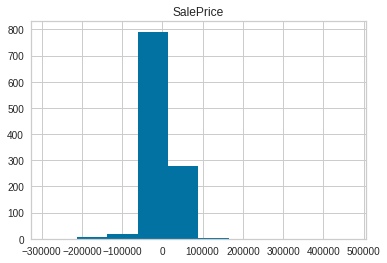

In [199]:
model_lr_pred_train = model_lr.predict(X_train)
model_lr_residuals_train = model_lr_pred_train - y_train
pd.DataFrame(model_lr_residuals_train).hist()

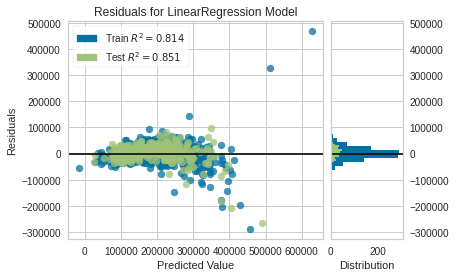

In [200]:
viz_lr = ResidualsPlot(model_lr)

viz_lr.fit(X_train, y_train) 
viz_lr.score(X_test, y_test)
viz_lr.show()   

In [201]:
regressionSummary(y_train, model_lr_pred_train)


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 33572.5358
            Mean Absolute Error (MAE) : 20127.0558
          Mean Percentage Error (MPE) : -1.6901
Mean Absolute Percentage Error (MAPE) : 11.7951


Prediction on validation data

In [204]:
x = regressionSummary(y_test, model_lr.predict(X_test).round(2))
model_lr_r_sq_test = model_lr.score(X_test,y_test)


Regression statistics

                      Mean Error (ME) : -3164.3633
       Root Mean Squared Error (RMSE) : 32305.9976
            Mean Absolute Error (MAE) : 20611.7252
          Mean Percentage Error (MPE) : -4.1272
Mean Absolute Percentage Error (MAPE) : 12.0344


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66346c2e50>]],
      dtype=object)

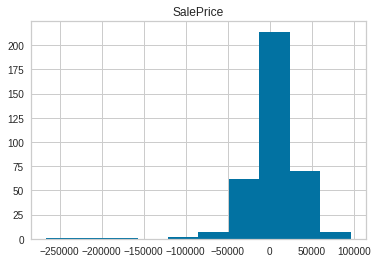

In [207]:
model_lr_pred_test = model_lr.predict(X_test)
model_lr_residuals_test = model_lr_pred_test - y_test
pd.DataFrame(model_lr_residuals_test).hist()

In [211]:
 perform_model_lr = pd.Series({"MSE" : round(sum(model_lr_residuals_test**2)/len(model_lr_residuals_test),3) ,
                             "RMSE" : round(np.sqrt(sum(model_lr_residuals_test**2)/len(model_lr_residuals_test)),3),
                             "MAE" : round(sum(abs(model_lr_residuals_test))/len(model_lr_residuals_test),3),
                             "R2 Score" : model_lr_r_sq})
perform_model_lr = pd.DataFrame(perform_model_lr).T
perform_model_lr.index = ["LinearRegression"]
perform_model_lr

,MSE,RMSE,MAE,R2 Score
LinearRegression,1.043677e+09,32305.997,20611.725,0.814358


Regularized Linear Regression

## Lasso

Model Fitting and parameter estimation

In [212]:
model_lasso = Lasso(normalize=True, alpha=1)
model_lasso.fit(X_train,y_train)
model_lasso_r_sq = model_lasso.score(X_train,y_train)

model_lasso_params = {"Score" : ["Coefficient of determination(R2)", "Intercept", "Slope"],
                      "Values" : [model_lasso_r_sq , model_lasso.intercept_, model_lasso.coef_]}
model_lasso_scores = pd.DataFrame(model_lasso_params)
model_lasso_scores

,Score,Values
0,Coefficient of determination(R2),0.814345
1,Intercept,181712.286758
2,Slope,"[4659.4662345503475, 18182.546376579503, 3276...."


In [213]:
betas_lasso = model_lasso_scores.iloc[2,1]
betas_lasso.tolist()
print(pd.DataFrame({'Predictor': X_train.columns, 'coefficient': model_lasso.coef_}))

          Predictor   coefficient
0           LotArea   4659.466235
1       OverallQual  18182.546377
2        MasVnrArea   3276.214974
3        BsmtFinSF1   1629.080333
4         BsmtUnfSF  -1432.147170
5          1stFlrSF   4806.477486
6          2ndFlrSF   1259.580900
7         GrLivArea  18132.298964
8      BsmtFullBath   4360.558926
9          FullBath    773.773792
10         HalfBath    870.789919
11       Fireplaces   4668.412943
12       GarageArea   6448.763960
13       WoodDeckSF   2686.100916
14      OpenPorchSF  -1254.236942
15         HouseAge   1383.635067
16  HouseRemodelAge   -775.022411
17        GarageAge     66.493596
18         MSZoning   4502.765866
19         LotShape   2687.078877
20        ExterQual   4882.199203
21       Foundation    264.794295
22         BsmtQual  11811.021929
23        HeatingQC   1806.796083
24       CentralAir   1324.976716
25       Electrical   -485.412505
26      KitchenQual   8812.520555
27     GarageFinish     34.676580
28       Paved

Prediction on validation data

In [214]:
regressionSummary(y_test, model_lasso.predict(X_test))
model_lasso_r_sq_test = model_lasso.score(X_test,y_test)


Regression statistics

                      Mean Error (ME) : -3164.3635
       Root Mean Squared Error (RMSE) : 32337.2965
            Mean Absolute Error (MAE) : 20622.0172
          Mean Percentage Error (MPE) : -4.1449
Mean Absolute Percentage Error (MAPE) : 12.0387


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f662fd4e590>]],
      dtype=object)

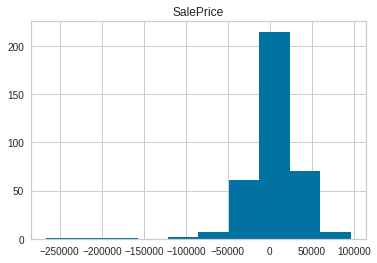

In [215]:
model_lasso_pred_test = model_lasso.predict(X_test)
model_lasso_residuals_test = model_lasso_pred_test - y_test
pd.DataFrame(model_lasso_residuals_test).hist()

In [216]:
perform_model_lasso = pd.Series({"MSE" : round(sum(model_lasso_residuals_test**2)/len(model_lasso_residuals_test),3) ,
                             "RMSE" : round(np.sqrt(sum(model_lasso_residuals_test**2)/len(model_lasso_residuals_test)),3),
                             "MAE" : round(sum(abs(model_lasso_residuals_test))/len(model_lasso_residuals_test),3),
                             "R2 Score" : model_lasso_r_sq_test})
perform_model_lasso = pd.DataFrame(perform_model_lasso).T
perform_model_lasso.index = ["LassoRegression"]
perform_model_lasso

,MSE,RMSE,MAE,R2 Score
LassoRegression,1.045701e+09,32337.296,20622.017,0.850727


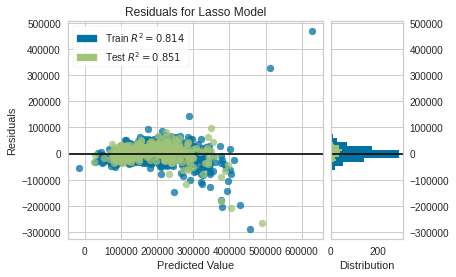

In [217]:
viz_lasso = ResidualsPlot(model_lasso)

viz_lasso.fit(X_train, y_train) 
viz_lasso.score(X_test, y_test)
viz_lasso.show() 

## Ridge

Model Fitting and parameter estimation

In [218]:
model_ridge = Ridge(normalize=True, alpha=1)
model_ridge.fit(X_train,y_train)
model_ridge_r_sq = model_ridge.score(X_train,y_train)

model_ridge_params = {"Score" : ["Coefficient of determination(R2)", "Intercept", "Slope"],
                      "Values" : [model_ridge_r_sq , model_ridge.intercept_, model_ridge.coef_]}
model_ridge_scores = pd.DataFrame(model_ridge_params)
model_ridge_scores

,Score,Values
0,Coefficient of determination(R2),0.789007
1,Intercept,181712.286758
2,Slope,"[3629.9654684455572, 9041.560304265355, 3972.8..."


In [219]:
betas_ridge = model_ridge_scores.iloc[2,1]
betas_ridge.tolist()
print(pd.DataFrame({'Predictor': X_train.columns, 'coefficient': model_ridge.coef_}))

          Predictor  coefficient
0           LotArea  3629.965468
1       OverallQual  9041.560304
2        MasVnrArea  3972.831203
3        BsmtFinSF1  3868.267129
4         BsmtUnfSF  1219.020891
5          1stFlrSF  6520.680342
6          2ndFlrSF  4280.627640
7         GrLivArea  8481.582360
8      BsmtFullBath  2864.299770
9          FullBath  3610.160993
10         HalfBath  2149.532024
11       Fireplaces  5134.912567
12       GarageArea  5736.723022
13       WoodDeckSF  2751.958981
14      OpenPorchSF   937.995821
15         HouseAge -1343.616248
16  HouseRemodelAge -2459.417065
17        GarageAge  -406.866189
18         MSZoning  2427.289813
19         LotShape  2237.775636
20        ExterQual  5669.529413
21       Foundation  2089.489074
22         BsmtQual  6779.970764
23        HeatingQC  2385.844484
24       CentralAir  1129.638832
25       Electrical   291.394587
26      KitchenQual  6712.511358
27     GarageFinish  2626.238127
28       PavedDrive   642.936079
29        


Prediction on validation data

In [220]:
regressionSummary(y_test, model_ridge.predict(X_test))
model_ridge_r_sq_test = model_ridge.score(X_test,y_test)


Regression statistics

                      Mean Error (ME) : -3164.3635
       Root Mean Squared Error (RMSE) : 36032.8947
            Mean Absolute Error (MAE) : 22117.3471
          Mean Percentage Error (MPE) : -6.1890
Mean Absolute Percentage Error (MAPE) : 12.7006


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f662ef32510>]],
      dtype=object)

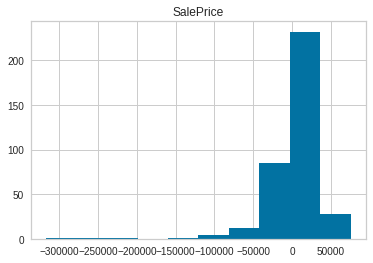

In [221]:
model_ridge_pred_test = model_ridge.predict(X_test)
model_ridge_residuals_test = model_ridge_pred_test - y_test
pd.DataFrame(model_ridge_residuals_test).hist()

In [222]:
perform_model_ridge = pd.Series({"MSE" : round(sum(model_ridge_residuals_test**2)/len(model_ridge_residuals_test),3) ,
                             "RMSE" : round(np.sqrt(sum(model_ridge_residuals_test**2)/len(model_ridge_residuals_test)),3),
                             "MAE" : round(sum(abs(model_ridge_residuals_test))/len(model_ridge_residuals_test),3),
                             "R2 Score" : model_ridge_r_sq_test})
perform_model_ridge = pd.DataFrame(perform_model_ridge).T
perform_model_ridge.index = ["RidgeRegression"]
perform_model_ridge

,MSE,RMSE,MAE,R2 Score
RidgeRegression,1.298369e+09,36032.895,22117.347,0.814659


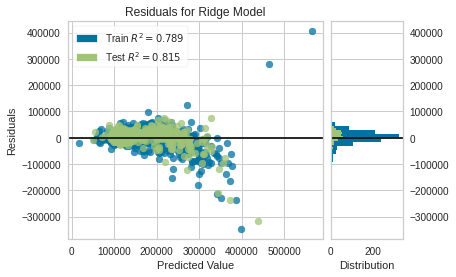

In [223]:
viz_ridge = ResidualsPlot(model_ridge)

viz_ridge.fit(X_train, y_train) 
viz_ridge.score(X_test, y_test)
viz_ridge.show() 

## Bayesian Ridge

Model fitting and parameter estimation

In [248]:
model_Bayesian = BayesianRidge(normalize=True)
model_Bayesian.fit(X_train,y_train)
model_Bayesian_r_sq = model_Bayesian.score(X_train,y_train)

model_Bayesian_params = {"Score" : ["Coefficient of determination(R2)", "Intercept", "Slope"],
                      "Values" : [model_Bayesian_r_sq , model_Bayesian.intercept_, model_Bayesian.coef_]}
model_Bayesian_scores = pd.DataFrame(model_Bayesian_params)
model_Bayesian_scores

,Score,Values
0,Coefficient of determination(R2),0.8142
1,Intercept,181712.286758
2,Slope,"[4611.817130178957, 17164.35550291089, 3368.41..."


In [249]:
betas_Bayesian_ridge = model_Bayesian_scores.iloc[2,1]
betas_Bayesian_ridge.tolist()
print(pd.DataFrame({'Predictor': X_train.columns, 'coefficient': model_Bayesian.coef_}))

          Predictor   coefficient
0           LotArea   4611.817130
1       OverallQual  17164.355503
2        MasVnrArea   3368.416284
3        BsmtFinSF1   2219.530848
4         BsmtUnfSF   -915.739727
5          1stFlrSF   8565.908144
6          2ndFlrSF   5792.551307
7         GrLivArea  12297.678971
8      BsmtFullBath   4275.546865
9          FullBath   1235.128834
10         HalfBath   1129.604192
11       Fireplaces   4834.914986
12       GarageArea   6500.622030
13       WoodDeckSF   2721.055741
14      OpenPorchSF  -1162.731329
15         HouseAge   1562.647444
16  HouseRemodelAge  -1028.962747
17        GarageAge     90.941703
18         MSZoning   4305.148974
19         LotShape   2696.980258
20        ExterQual   5179.099364
21       Foundation    510.009987
22         BsmtQual  11370.324718
23        HeatingQC   1828.127139
24       CentralAir   1345.847213
25       Electrical   -524.688759
26      KitchenQual   8734.781456
27     GarageFinish    248.015534
28       Paved

Prediction on validation dataset

In [250]:
regressionSummary(y_test, model_Bayesian.predict(X_test))
model_Bayesian_r_sq_test = model_Bayesian.score(X_test,y_test)


Regression statistics

                      Mean Error (ME) : -3164.3635
       Root Mean Squared Error (RMSE) : 32323.1896
            Mean Absolute Error (MAE) : 20580.7134
          Mean Percentage Error (MPE) : -4.2120
Mean Absolute Percentage Error (MAPE) : 11.9821


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f662e665ed0>]],
      dtype=object)

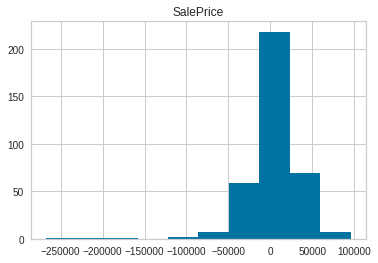

In [251]:
model_Bayesian_pred_test = model_Bayesian.predict(X_test)
model_Bayesian_residuals_test = model_Bayesian_pred_test - y_test
pd.DataFrame(model_Bayesian_residuals_test).hist()

In [258]:
perform_model_Bayesian = pd.Series({"MSE" : round(sum(model_Bayesian_residuals_test**2)/len(model_Bayesian_residuals_test),3) ,
                             "RMSE" : round(np.sqrt(sum(model_Bayesian_residuals_test**2)/len(model_Bayesian_residuals_test)),3),
                             "MAE" : round(sum(abs(model_Bayesian_residuals_test))/len(model_Bayesian_residuals_test),3),
                             "R2 Score" : model_Bayesian_r_sq_test})
perform_model_Bayesian = pd.DataFrame(perform_model_Bayesian).T
perform_model_Bayesian.index = ["BayesianRegression"]
perform_model_Bayesian

,MSE,RMSE,MAE,R2 Score
BayesianRegression,1.044789e+09,32323.19,20580.713,0.850858


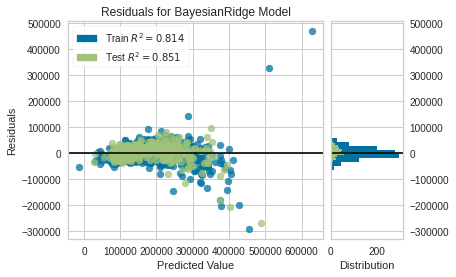

In [254]:
viz_Bayesian = ResidualsPlot(model_Bayesian)

viz_Bayesian.fit(X_train, y_train) 
viz_Bayesian.score(X_test, y_test)
viz_Bayesian.show() 

## Decision Tree

In [225]:
depth_values = list(range(1, 14))

predict_y_training = []
predict_y_validation = []

error_training = []
error_validation = []
error_training = pd.DataFrame(columns = depth_values)
error_validation = pd.DataFrame(columns = depth_values)
mse_rmse_training = []
mse_rmse_validation = []

# For loop to fit model and predict y for different values of lambda
for a in depth_values:
    df_decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = a, random_state = 42)
    df_decision_tree.fit(X_train, y_train)
    # Append y values for each depth value into predict_values list
    predict_y_training.append(df_decision_tree.predict(X_train))
    predict_y_validation.append(df_decision_tree.predict(X_test))

# Storing the predicted values in dataframes
predict_y_training = pd.DataFrame(predict_y_training, index = depth_values).T
predict_y_validation = pd.DataFrame(predict_y_validation, index = depth_values).T

# For loop to calculate mse for each depth value
for each_depth in predict_y_training.columns:
  error_training[each_depth] = predict_y_training[each_depth] - y_train
  mse_rmse_training.append(metrics.mean_squared_error(y_train, predict_y_training[each_depth]))

# For loop to calculate mse for each depth value
for each_depth in predict_y_validation.columns:
  error_validation[each_depth] = predict_y_validation[each_depth] - y_test
  mse_rmse_validation.append(metrics.mean_squared_error(y_test, predict_y_validation[each_depth]))

mse_rmse_training = pd.DataFrame(mse_rmse_training, index = depth_values, columns = {"Traing_MSE"})
mse_rmse_validation = pd.DataFrame(mse_rmse_validation, index = depth_values, columns = {"Validation_MSE"})
mse_rmse = pd.concat([mse_rmse_training, mse_rmse_validation], axis = 1)

# Calculate RMSE
mse_rmse["Traing_RMSE"] = np.sqrt(mse_rmse["Traing_MSE"])
mse_rmse["Validation_RMSE"] = np.sqrt(mse_rmse["Validation_MSE"])
mse_rmse

,Traing_MSE,Validation_MSE,Traing_RMSE,Validation_RMSE
1,3.510658e+09,3.832412e+09,59250.803335,61906.479542
2,3.204378e+09,3.598836e+09,56607.227357,59990.302787
3,2.922928e+09,3.049364e+09,54064.108123,55221.049351
4,3.007057e+09,3.385512e+09,54836.638437,58185.156380
5,2.028297e+09,1.931161e+09,45036.613699,43944.978499
6,2.568276e+09,2.515355e+09,50678.165504,50153.316081
7,2.601421e+09,3.762989e+09,51004.131891,61343.209988
8,2.082823e+09,2.854814e+09,45637.951738,53430.461878
9,1.059326e+09,2.491267e+09,32547.290951,49912.590246
10,1.578689e+08,2.048577e+09,12564.590101,45261.203628


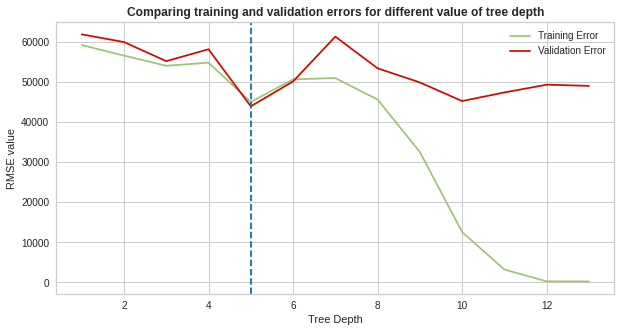

In [226]:
plt.figure(figsize = (10, 5))
# Plot training error
plt.plot(mse_rmse.index, mse_rmse['Traing_RMSE'],
         color = 'g', label = 'Training Error')

# Plot validation error on the same graph
plt.plot(mse_rmse.index, mse_rmse['Validation_RMSE'],
         color = 'r', label = 'Validation Error')

plt.legend()
plt.title("Comparing training and validation errors for different value of tree depth",
          weight = "bold")
plt.ylabel("RMSE value")
plt.xlabel("Tree Depth")
plt.axvline(x = 5, linestyle = '--', c = 'b')
plt.show()

In [264]:
# Choosing optimal number of tree depths = 5, where RMSE is minimum
# Model fitting
df_decision_tree = DecisionTreeClassifier(criterion = 'entropy',
                                          max_depth = 5, random_state = 42)
df_decision_tree.fit(X_train, y_train)

# Make predictions for Model 1
predict_y_dt = df_decision_tree.predict(X_test)

# Calculate error in predictions
error_model_1 = predict_y_dt - y_test

# Model 1 - actual, predicted and residual
model_1 = pd.DataFrame({"Actual Sale Price": y_test,
                        "Predicted Sale Price": predict_y_dt,
                        "Residual": error_model_1})
model_1.head()

,Actual Sale Price,Predicted Sale Price,Residual
892,154500,139000,-15500
1105,325000,315000,-10000
413,115000,129000,14000
522,159000,148500,-10500
1036,315500,232000,-83500


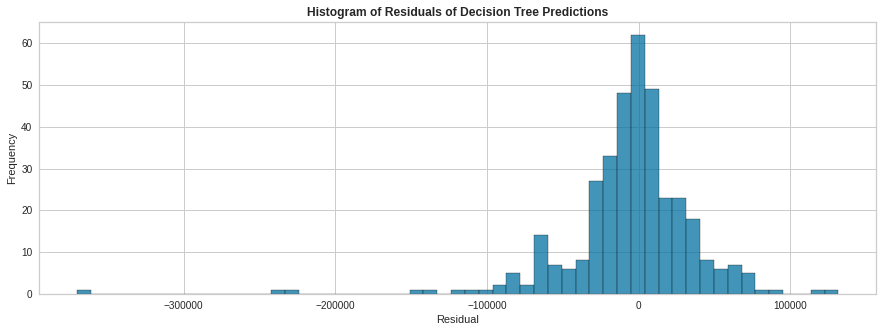

In [228]:
# Histogram of Residuals of Model 1
plt.figure(figsize = (15, 5))
sns.histplot(model_1.Residual)
plt.title("Histogram of Residuals of Decision Tree Predictions", weight = "bold")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

In [229]:
# MSE, RMSE, MAE and R2 score of Model 1
mse_model_1 = metrics.mean_squared_error(y_test, predict_y_dt)
rmse_model_1 = np.sqrt(mse_model_1)
mae_model_1 = metrics.mean_absolute_error(y_test, predict_y_dt)
r2_model_1 = metrics.r2_score(y_test, predict_y_dt)

perform_model_1 = pd.Series({"MSE" : mse_model_1,
                             "RMSE" : rmse_model_1,
                             "MAE" : mae_model_1,
                             "R2 Score" : r2_model_1})
perform_model_1 = pd.DataFrame(perform_model_1).T
perform_model_1.index = ["Decision_Tree"]
perform_model_1

,MSE,RMSE,MAE,R2 Score
Decision_Tree,1.931161e+09,43944.978499,27152.969863,0.724329


## Random Forest

In [380]:
# Model fitting
df_random_forest = RandomForestRegressor(n_estimators = 100, random_state = 42)
df_random_forest.fit(X_train, y_train)

# Make predictions for Model 1
predict_y_rf = df_random_forest.predict(X_test)

# Calculate error in predictions
error_model_2 = predict_y_rf - y_test

# Model 2 - actual, predicted and residual
model_2 = pd.DataFrame({"Actual Sale Price": y_test,
                        "Predicted Sale Price": predict_y_rf,
                        "Residual": error_model_2})
model_2.head()

,Actual Sale Price,Predicted Sale Price,Residual
892,154500,139269.00,-15231.00
1105,325000,347578.67,22578.67
413,115000,115473.75,473.75
522,159000,156873.84,-2126.16
1036,315500,330219.89,14719.89


In [391]:
model_2_feat_import = np.array([np.transpose(X_train.columns), np.transpose(df_random_forest.feature_importances_)])
#pd.DataFrame(data=model_2_feat_import, columns= ["Feature Name", "Feature Importance"])
feature_importance = pd.DataFrame(model_2_feat_import[1],model_2_feat_import[0])
feature_importance =  feature_importance.reset_index()
model_2_feature_import = feature_importance.rename(columns={"index": "Feature Names", 0 :"Feature Importance"})
model_2_feature_import.sort_values("Feature Importance", ascending=False)

,Feature Names,Feature Importance
1,OverallQual,0.55735
7,GrLivArea,0.1327
5,1stFlrSF,0.050113
6,2ndFlrSF,0.036664
3,BsmtFinSF1,0.035239
12,GarageArea,0.026169
0,LotArea,0.024062
15,HouseAge,0.019498
22,BsmtQual,0.014204
16,HouseRemodelAge,0.011253


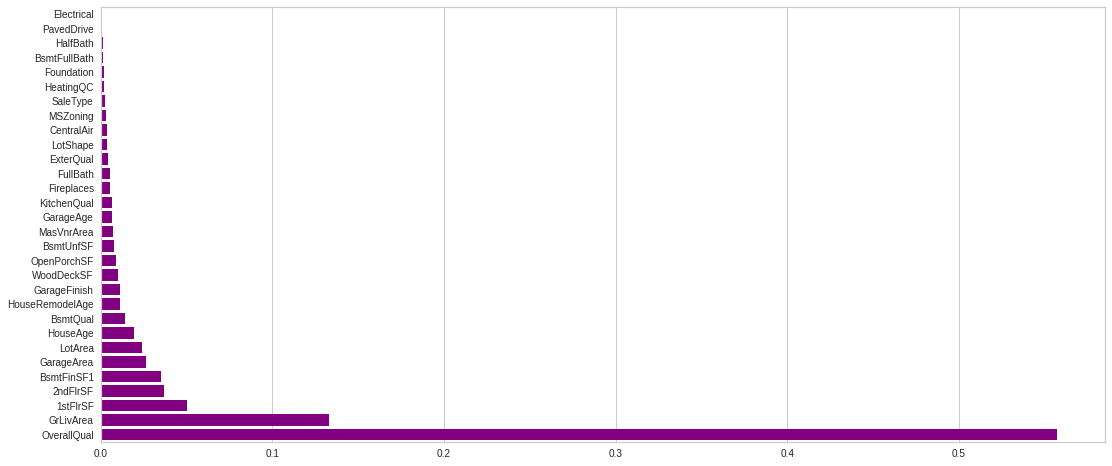

In [308]:
plt.figure(figsize = (18, 8))

model_2_feaures = list(zip(X_train.columns,df_random_forest.feature_importances_))
model_2_feaures.sort(key = lambda x : x[1])

#plt.barh([x[0] for x in model_2_feaures],[x[1] for x in model_2_feaures], color='afmhot' )
x_col = [x[0] for x in model_2_feaures]
y_col = [x[1] for x in model_2_feaures]
sns.barplot( x = y_col, y = x_col,color="purple", saturation=10)
#sns.color_palette("gist_stern_r", as_cmap=True)
plt.show()

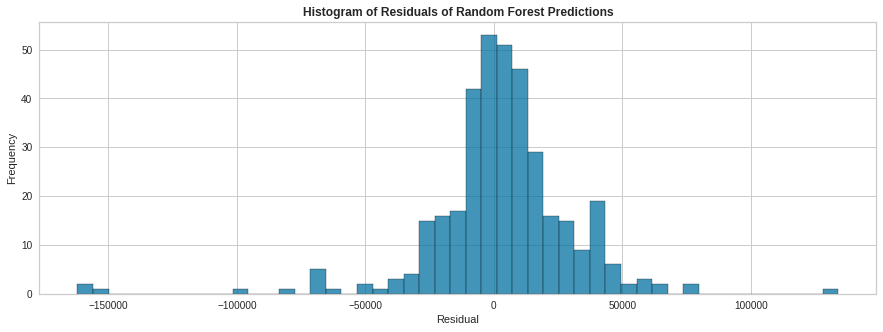

In [231]:
# Histogram of Residuals of Model 2
plt.figure(figsize = (15, 5))
sns.histplot(model_2.Residual)
plt.title("Histogram of Residuals of Random Forest Predictions", weight = "bold")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

In [232]:
# MSE, RMSE, MAE and R2 score of Model 2
mse_model_2 = metrics.mean_squared_error(y_test, predict_y_rf)
rmse_model_2 = np.sqrt(mse_model_2)
mae_model_2 = metrics.mean_absolute_error(y_test, predict_y_rf)
r2_model_2 = metrics.r2_score(y_test, predict_y_rf)

perform_model_2 = pd.Series({"MSE" : mse_model_2,
                             "RMSE" : rmse_model_2,
                             "MAE" : mae_model_2,
                             "R2 Score" : r2_model_2})
perform_model_2 = pd.DataFrame(perform_model_2).T
perform_model_2.index = ["Random_Forest"]
perform_model_2

,MSE,RMSE,MAE,R2 Score
Random_Forest,8.177464e+08,28596.264753,18628.220648,0.883268


## Comparing models' performance

Text(0, 0.5, 'R2 Scores')

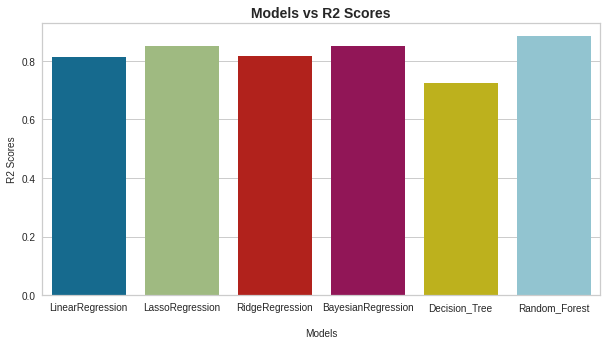

In [259]:
plt.figure(figsize = (10, 5))

model_perform_all = [perform_model_lr, perform_model_lasso, perform_model_ridge, perform_model_Bayesian, perform_model_1, perform_model_2]
model_perf = pd.concat(model_perform_all)
model_perf = model_perf.reset_index()
model_perf = model_perf.rename(columns={"index" : "Model", "R2 Score" : "R2_Score"})

plt.title('Models vs R2 Scores', weight = "bold", fontsize = 14)
sns.barplot(x=model_perf["Model"], y = model_perf["R2_Score"])
plt.xlabel("\nModels", fontsize = 10)
plt.ylabel("R2 Scores", fontsize = 10)



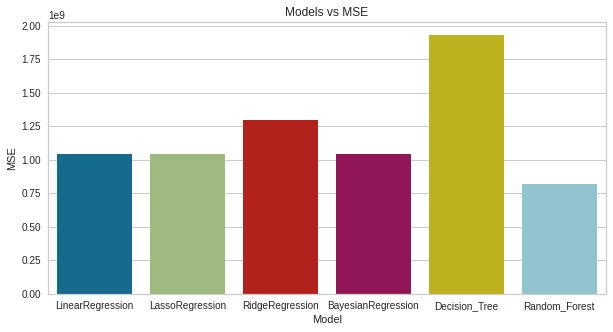

In [260]:
plt.figure(figsize = (10, 5))

plt.title('Models vs MSE')

sns.barplot(x=model_perf["Model"], y = model_perf["MSE"])

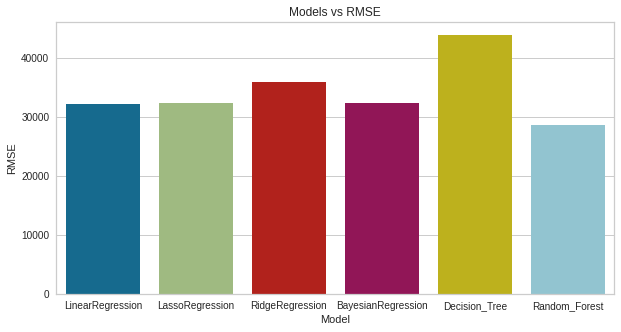

In [261]:
plt.figure(figsize = (10, 5))
plt.title('Models vs RMSE')
sns.barplot(x=model_perf["Model"], y = model_perf["RMSE"])

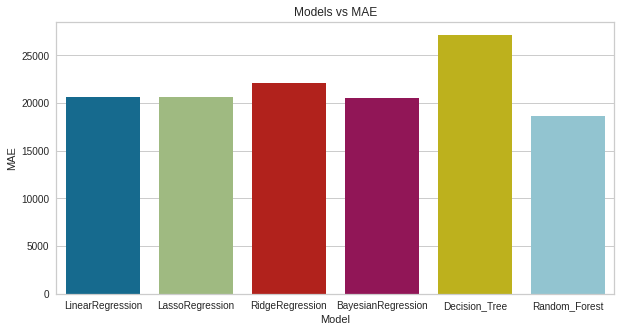

In [262]:
plt.figure(figsize = (10, 5))
plt.title('Models vs MAE')
sns.barplot(x=model_perf["Model"], y = model_perf["MAE"])